In [18]:
import math
import numpy as np
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit
import scipy.optimize as optimize
import scipy.stats as stats
import pandas as pd
import xlrd
import csv

In [19]:
mu_wall = []
mu_b = []
v = []
E_nev = []
P_wall = []
P_3 = []
P_b = []
P_holeg = []
P_holev = []
P_n = []
Sum_Load = []
Sum_Store = []

with open('UCNstoragecalcsreformatted.csv', 'r') as ifile:
    data = csv.reader(ifile)
    
    counter = 0
    for row in data:
        if counter == 1:
            
            mu_wall.append(float(row[0]))
            mu_b.append(float(row[1]))
            v.append(float(row[2]))
            E_nev.append(float(row[3]))
            P_wall.append(float(row[4]))
            P_3.append(float(row[5]))
            P_b.append(float(row[6]))
            P_holeg.append(float(row[7]))
            P_holev.append(float(row[8]))
            P_n.append(float(row[9]))
            Sum_Load.append(float(row[10]))
            Sum_Store.append(float(row[11]))
            
        else:
            counter+=1




In [20]:
mu_wall = []
mu_b = []
v = []
E_nev = []
P_wall = []
P_3 = []
P_b = []
P_holeg = []
P_holev = []
P_n = []
Sum_Load = []
Sum_Store = []

with open('UCNstoragecalcsreformatted.csv', 'r') as ifile:
    data = csv.reader(ifile)
    
    counter = 0
    for row in data:
        if counter == 1:
            
            mu_wall.append(float(row[0]))
            mu_b.append(float(row[1]))
            v.append(float(row[2]))
            E_nev.append(float(row[3]))
            P_wall.append(float(row[4]))
            P_3.append(float(row[5]))
            P_b.append(float(row[6]))
            P_holeg.append(float(row[7]))
            P_holev.append(float(row[8]))
            P_n.append(float(row[9]))
            Sum_Load.append(float(row[10]))
            Sum_Store.append(float(row[11]))
            
        else:
            counter+=1




In [21]:
mu_wall = np.asarray(mu_wall)
mu_b = np.asarray(mu_b)
v = np.asarray(v)
E_nev = np.asarray(E_nev)
P_wall = np.asarray(P_wall)
P_3 = np.asarray(P_3)
P_b = np.asarray(P_b)
P_holeg = np.asarray(P_holeg)
P_holev = np.asarray(P_holev)
P_n = np.asarray(P_n)
Sum_Load = np.asarray(Sum_Load)
Sum_Store = np.asarray(Sum_Store)

a_hole_g = 12
vol_fill = 40000

Verify these plots are as expected

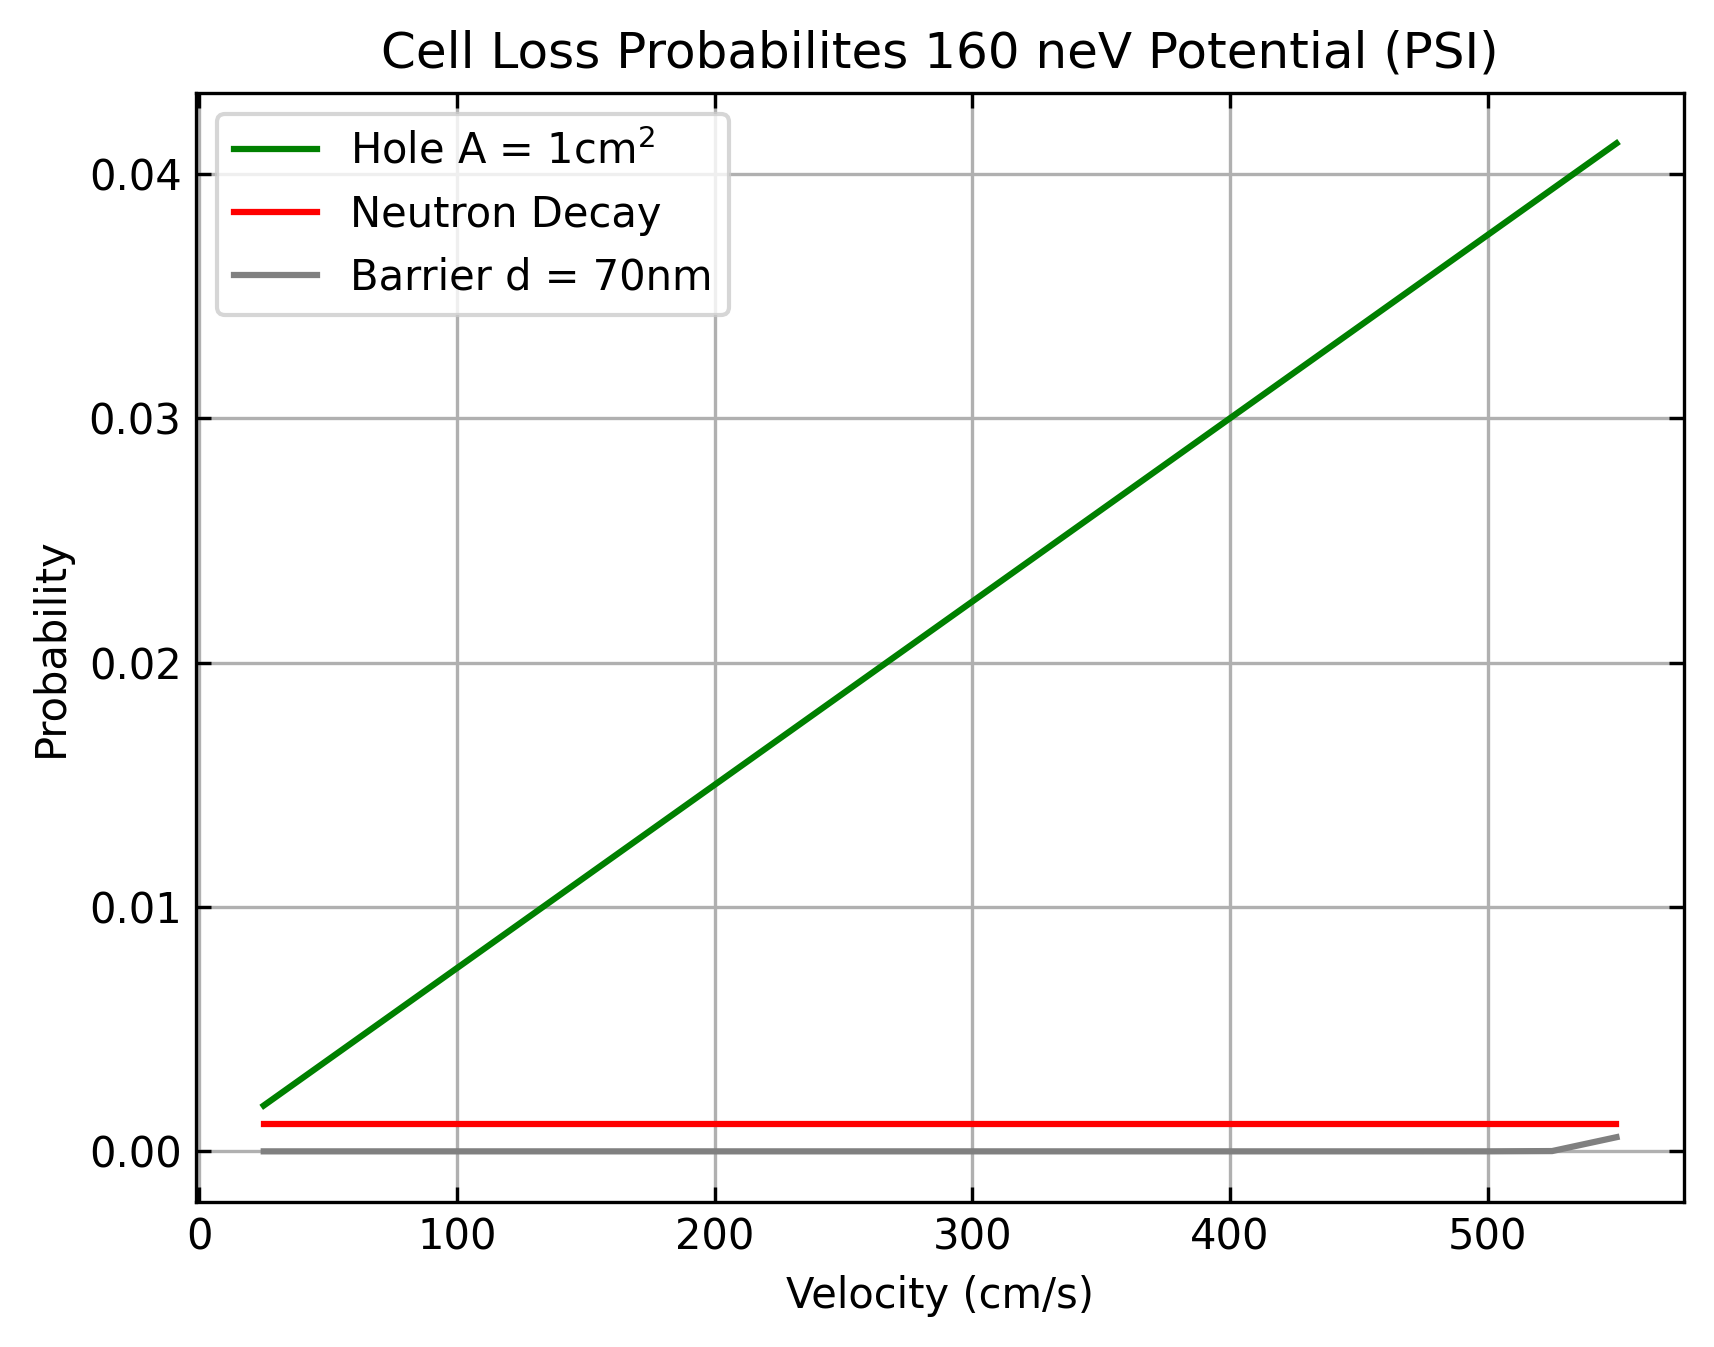

In [22]:
plot.figure(dpi = 300)
plot.plot(v, P_holeg, color='green', label = "Hole A = 1cm$^2$")
plot.plot(v, P_n, color='red', label = "Neutron Decay")
plot.plot(v, P_b, color='gray',label = "Barrier d = 70nm")
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('Velocity (cm/s)')
plot.ylabel('Probability')
plot.title('Cell Loss Probabilites 160 neV Potential (PSI)')
plot.grid()
plot.show()

In [23]:
import numpy as np
#For discrete data points, we need to interpolate to get the specific
#values in between the data points obtained/given.


v_arr = v
P_holeg_arr = P_holeg

#linear interpolation
def interpolate(v, v_arr, p_holeg_arr):
    return np.interp(v, v_arr, p_holeg_arr)



#Checks whether inputted value is a number before breaking
#Ensures code doesn't malfunction if input contains letters or special characters
while True:
    Value = input()
    try:
        value_float = float(Value)
        result_y = interpolate(value_float, v_arr, P_holeg_arr)
        print(f"At v = {value_float} cm/s, P = {result_y:.5f}")
        break
    except ValueError:
            print("Enter a valid number.")
            



At v = 245.0 cm/s, P = 0.01837


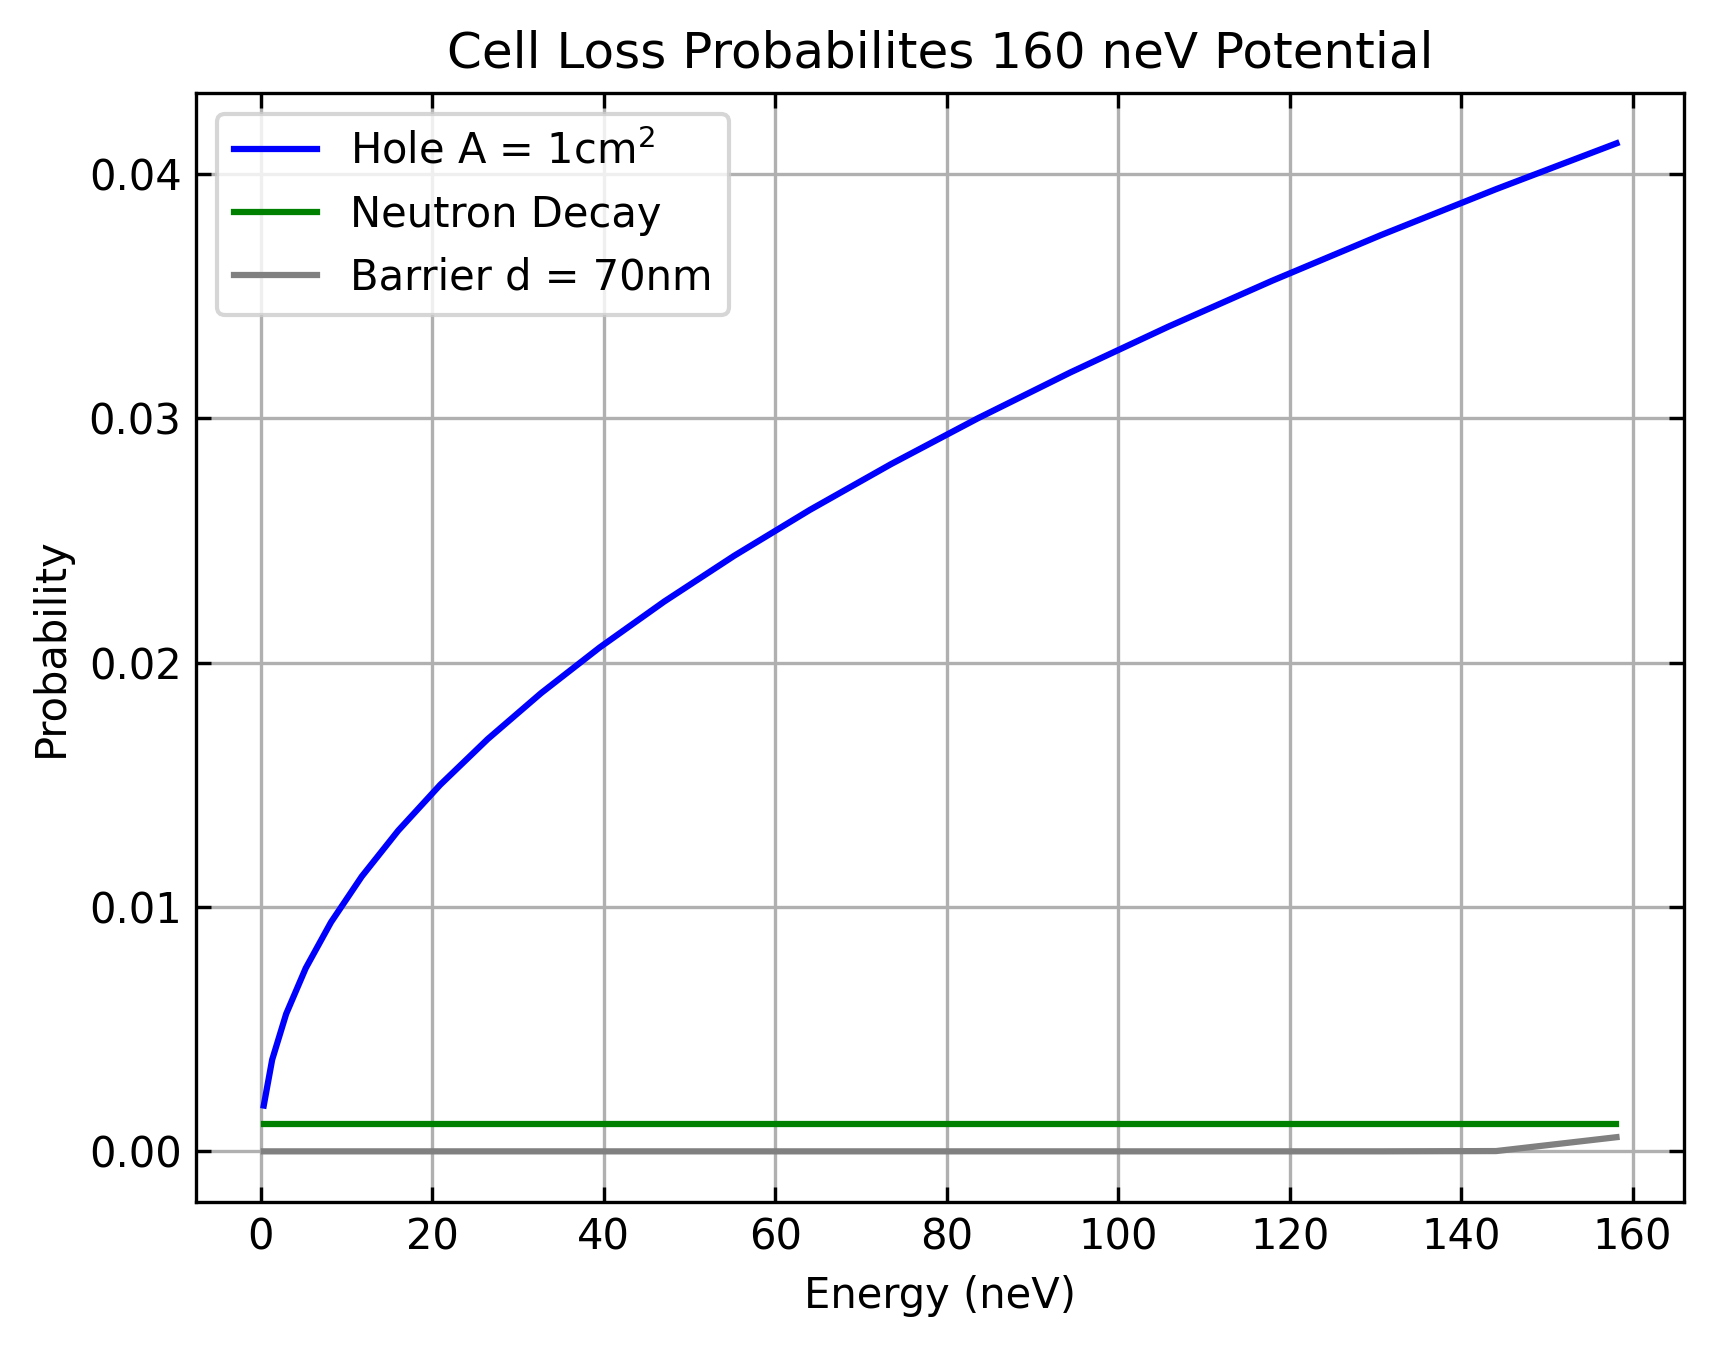

In [24]:
plot.figure(dpi = 300)
plot.plot(E_nev, P_holeg, c = "blue", label = "Hole A = 1cm$^2$")
plot.plot(E_nev, P_n, c = "green", label = "Neutron Decay")
plot.plot(E_nev, P_b, c = "grey", label = "Barrier d = 70nm")
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('Energy (neV)')
plot.ylabel('Probability')
plot.title('Cell Loss Probabilites 160 neV Potential')
plot.grid()
plot.show()

In [25]:
#Slightly mundane, done for personal preference
E_arr = E_nev 

logE = np.log(E_nev)

def interpolate_log(E_nev, E_arr, P_holeg_arr):
    logE = np.interp(np.log(E_nev), E_arr, P_holeg_arr)
    return logE

specific_x2 = 332  # Replace this with the x-value you want to find the y-value for
result_y2 = np.exp(interpolate_log(specific_x2, E_arr, P_holeg_arr))  # Exponentiate the interpolated log value
print(f"At E = {specific_x2} neV, y = {result_y2}")

At E = 332 neV, y = 1.0078996381273657


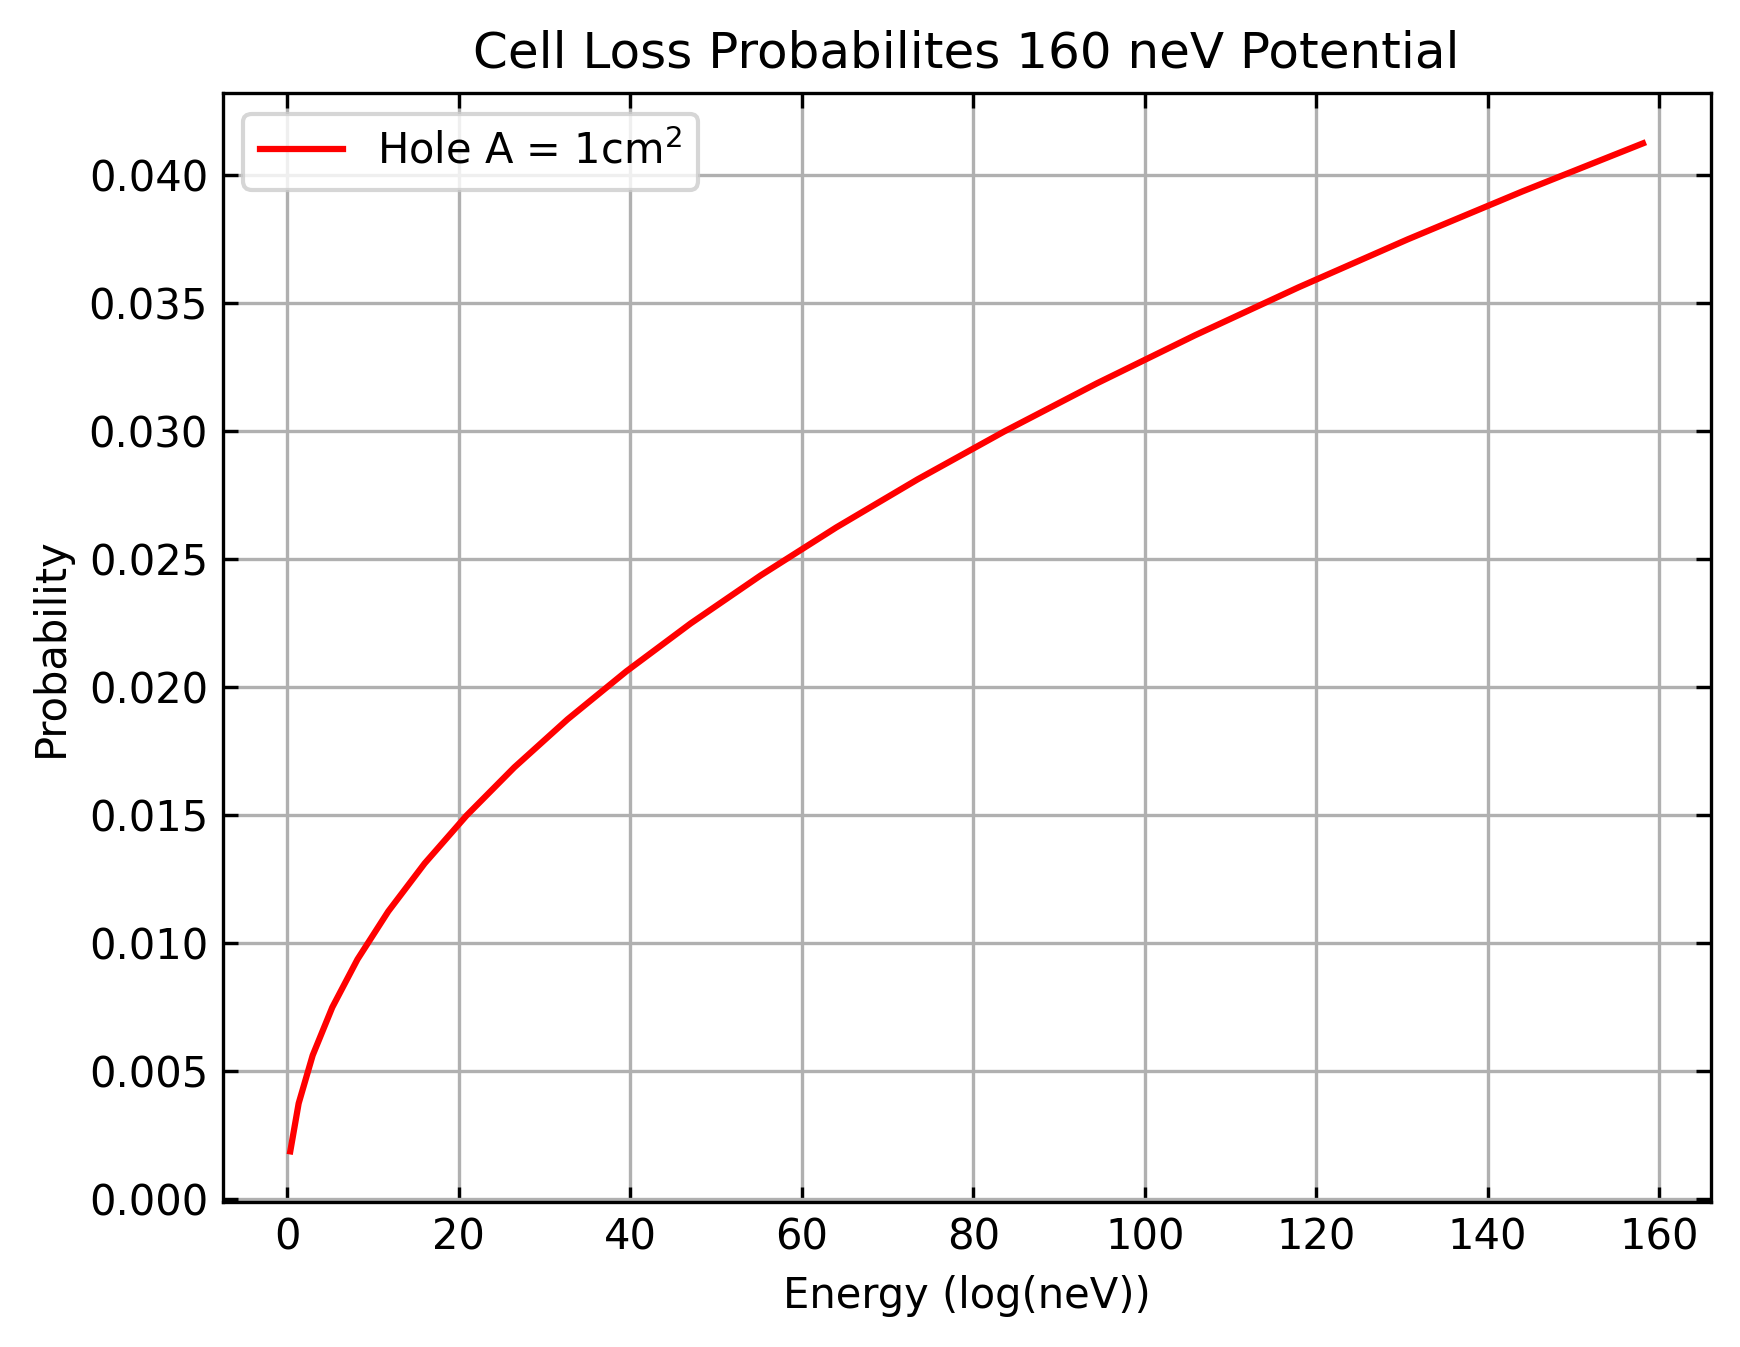

In [26]:
plot.figure(dpi = 300)
plot.plot(E_nev, P_holeg, c = "red", label = "Hole A = 1cm$^2$")
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('Energy (log(neV))')
plot.ylabel('Probability')
plot.title('Cell Loss Probabilites 160 neV Potential')
plot.grid()
plot.show()

In [27]:
##Values taken directly from UCN data
v_M = 554.1
tau_n = 878.0
N_0v = 100000
Lambda = 15.0
f = 8.00 * 10**-5
t_step = 20.0
v_step = 25.0
f = 0.00001
V_nev = 160
three_He = 1000000000
vol_fill = 40000
a_hole_guide = 12
vol_store = 20000
a_hole_valve = 0

In [28]:
##Define some functions to help fix array issue, makes more efficient
def E_nev(v):
    return 9.39565 / 2/(2.9979)**2 * 0.001 * (v**2)

def mu_wall(E_nev):
    return 2*0.00001 * (160 / E_nev * np.arcsin(math.sqrt(E_nev/160))-math.sqrt(160/E_nev-1))

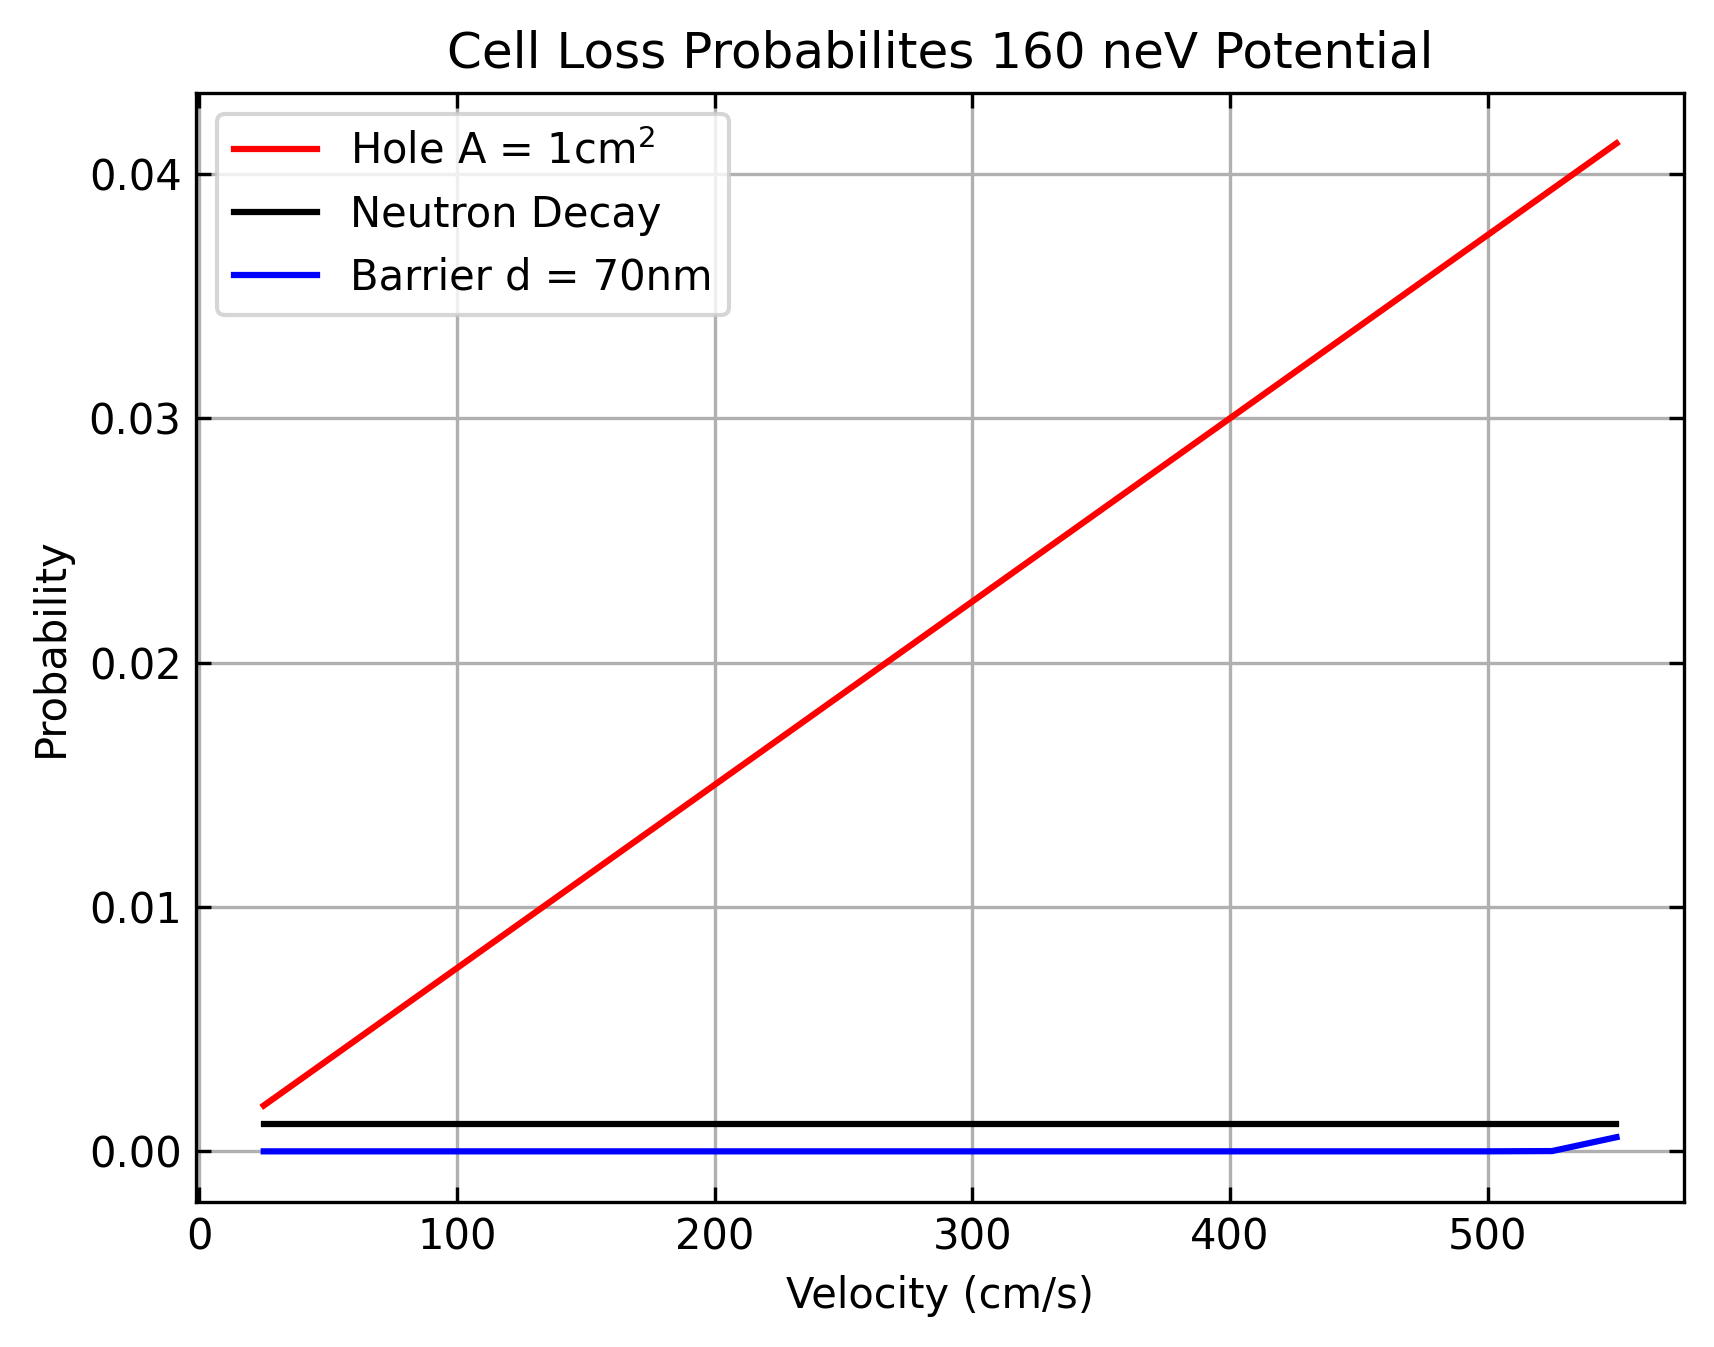

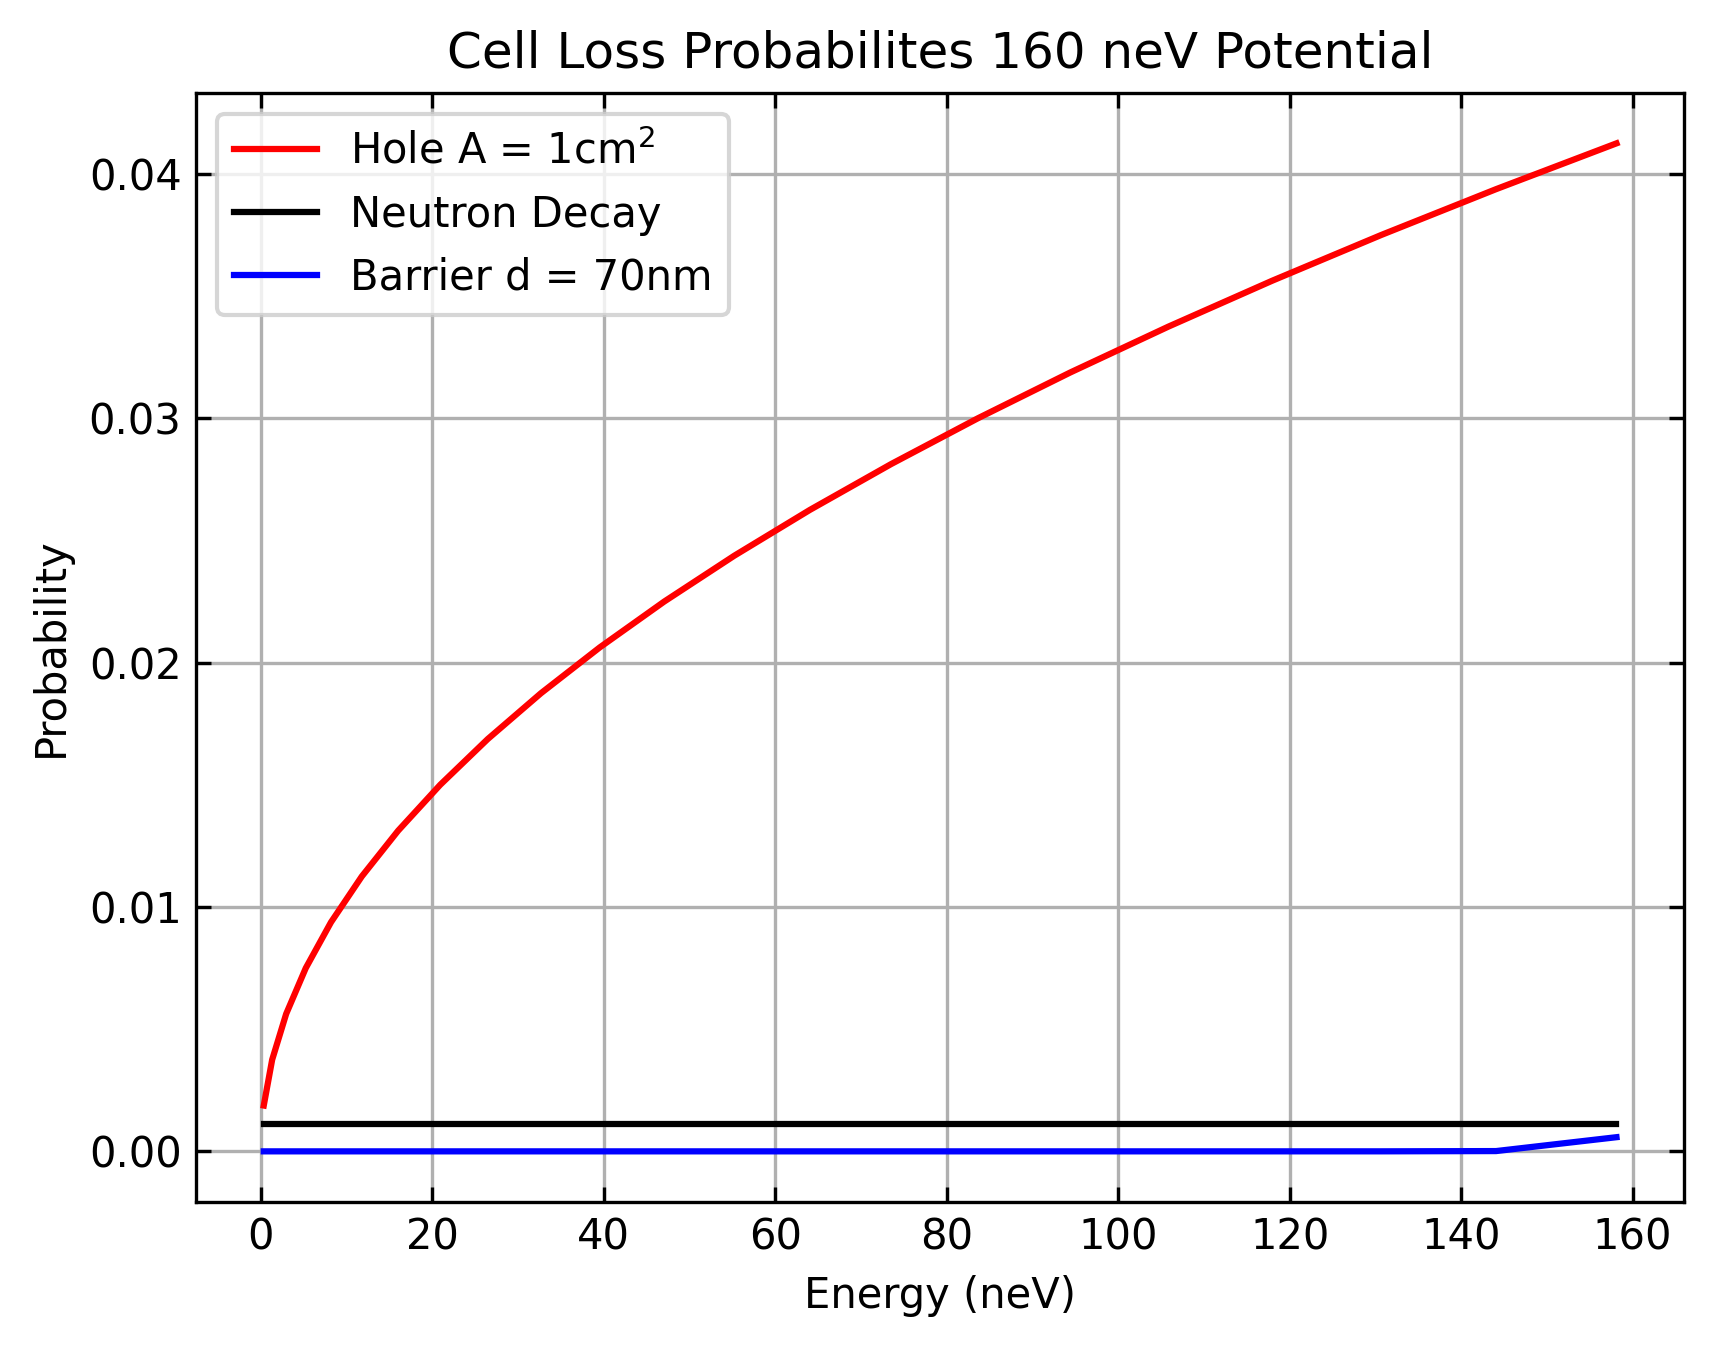

In [29]:
## Putting the calculations directly into python rather than pulling
## from excel

v = np.linspace(25, 550, num=22) 
E_nev = 9.39565 / 2/(2.9979)**2 * 0.001 * (v**2)
P_3 = 1 / three_He
mu_wall = 2*f * (V_nev / E_nev * np.arcsin(np.sqrt(E_nev/V_nev))-np.sqrt(V_nev/E_nev-1))
p_wall = E_nev / 15.0 * mu_wall
p_holeg = v * a_hole_guide / 4 / vol_fill
p_n = 1 / tau_n
P_b = v / Lambda * mu_b
p_holev = v * a_hole_valve / 4 /  vol_store
sum_load = p_wall + P_3 + p_holeg + p_n
sum_store = p_wall + P_3 + p_holev + p_n + P_b

#Double check to make sure you've defined p_b and p_holev###
#time dependence###

#prints all values, put [] for a specific value
#print(E_nev)
#print(type(E_nev))
#print(mu_wall)

plot.figure(dpi = 300)
plot.plot(v, P_holeg, color='red', label = "Hole A = 1cm$^2$")
plot.plot(v, P_n, color='black', label = "Neutron Decay")
plot.plot(v, P_b, color='blue',label = "Barrier d = 70nm")
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('Velocity (cm/s)')
plot.ylabel('Probability')
plot.title('Cell Loss Probabilites 160 neV Potential')
plot.grid()
plot.show()

plot.figure(dpi = 300)
plot.plot(E_nev, P_holeg, c = "red", label = "Hole A = 1cm$^2$")
plot.plot(E_nev, P_n, c = "black", label = "Neutron Decay")
plot.plot(E_nev, P_b, c = "blue", label = "Barrier d = 70nm")
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('Energy (neV)')
plot.ylabel('Probability')
plot.title('Cell Loss Probabilites 160 neV Potential')
plot.grid()
plot.show()

Change error, to square root of counts for now 

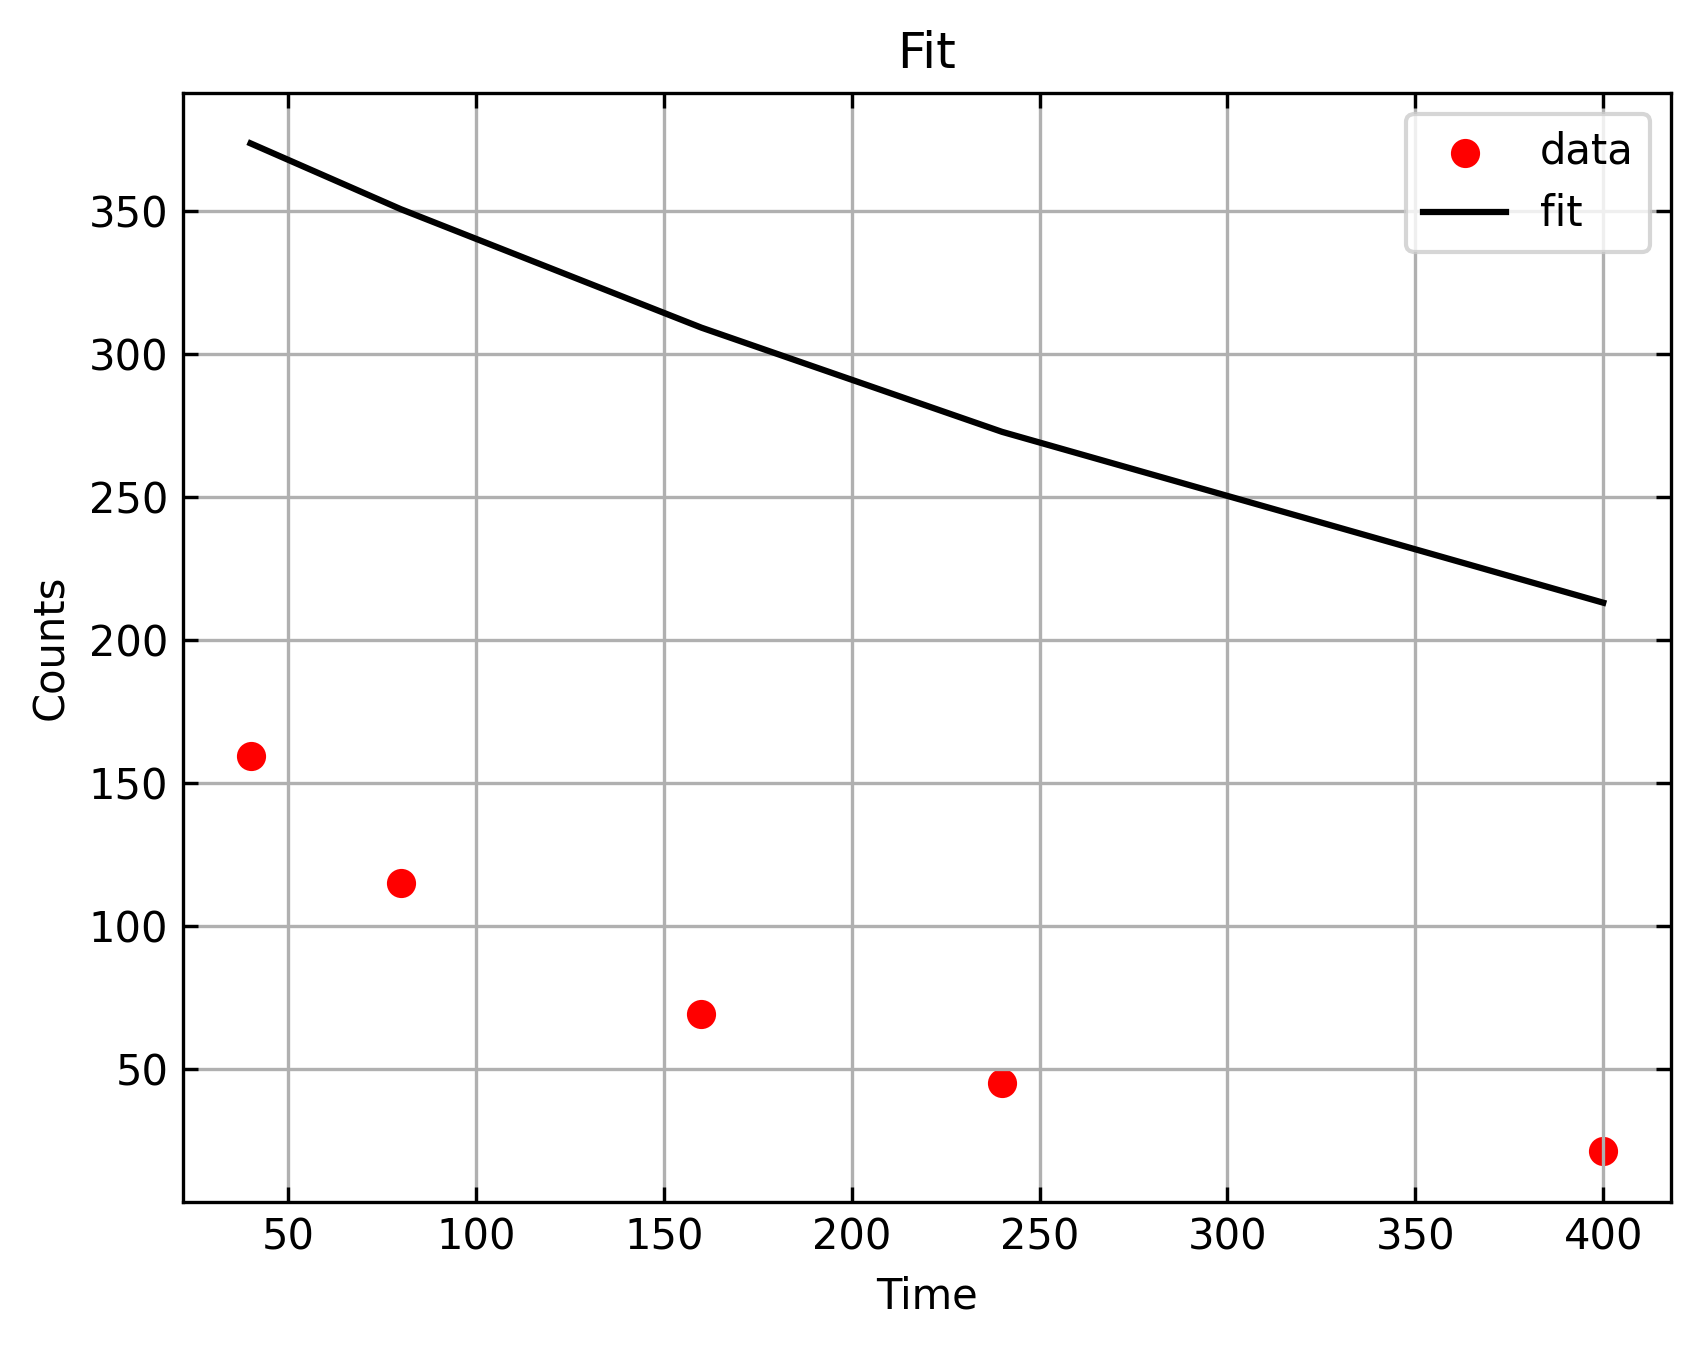

In [30]:
t2 = [40.0, 80.0, 160.0, 240.0, 400.0]
t2 = np.asarray(t2)
a = [159.6, 115.0, 69.3, 45.1, 21.3]
a = np.asarray(a)
a2 = [373.5, 350.5, 309.1, 272.7, 213.0]
a2 = np.asarray(a2)
a_err = np.sqrt(a)
y_err = np.asarray(a_err)

plot.figure(dpi = 300)
plot.scatter(t2, a, c = "red", label = "data")
plot.plot(t2, a2, c = "black", label = "fit")
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('Time')
plot.ylabel('Counts')
plot.title('Fit')
plot.grid()
plot.show()

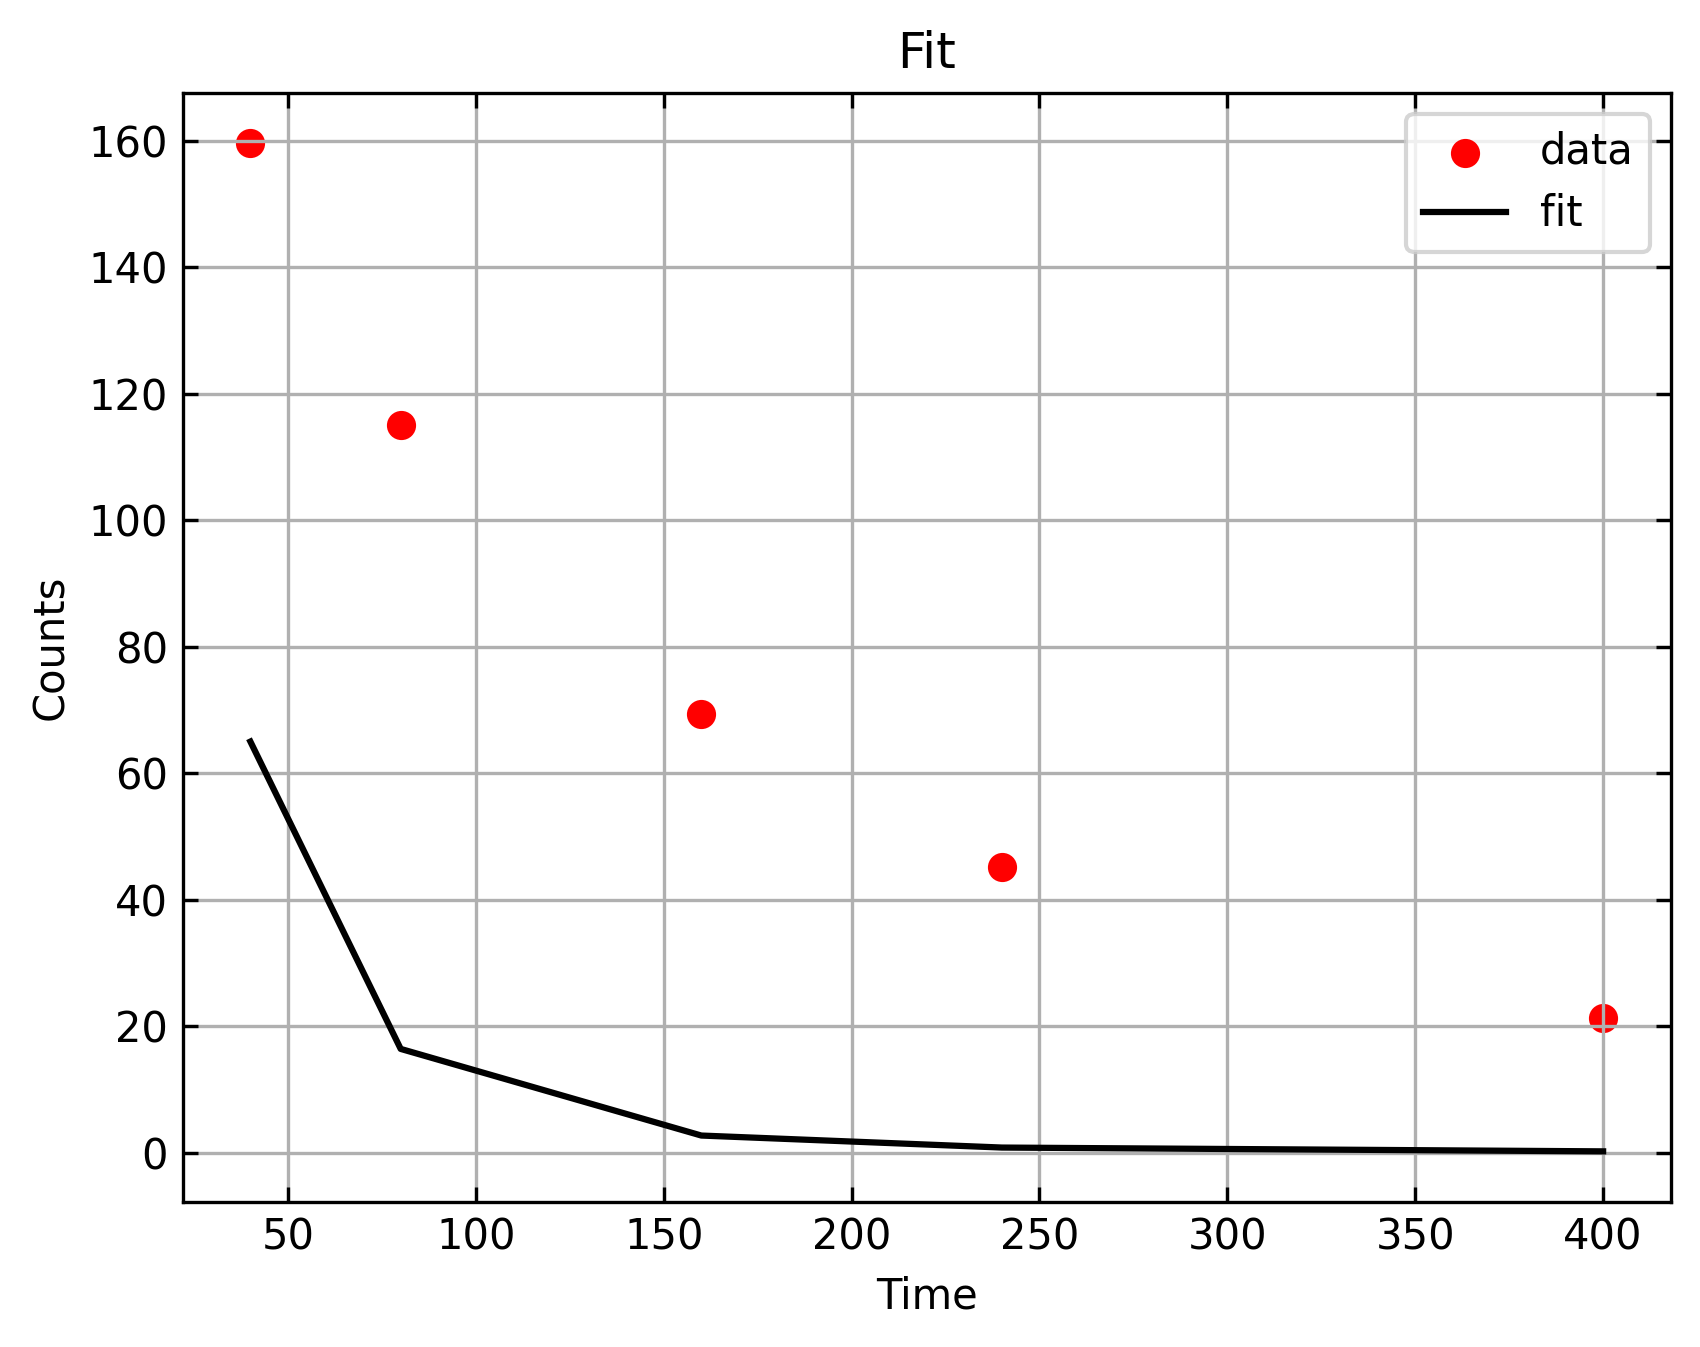

In [31]:
t2 = [40.0, 80.0, 160.0, 240.0, 400.0]
t2 = np.asarray(t2)
a = [159.6, 115.0, 69.3, 45.1, 21.3]
a = np.asarray(a)
a2 = [65.0, 16.4, 2.7, 0.8, 0.2]
a_err = np.sqrt(a)
y_err = np.asarray(a_err)

plot.figure(dpi = 300)
plot.scatter(t2, a, c = "red", label = "data")
plot.plot(t2, a2, c = "black", label = "fit")
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('Time')
plot.ylabel('Counts')
plot.title('Fit')
plot.grid()
plot.show()

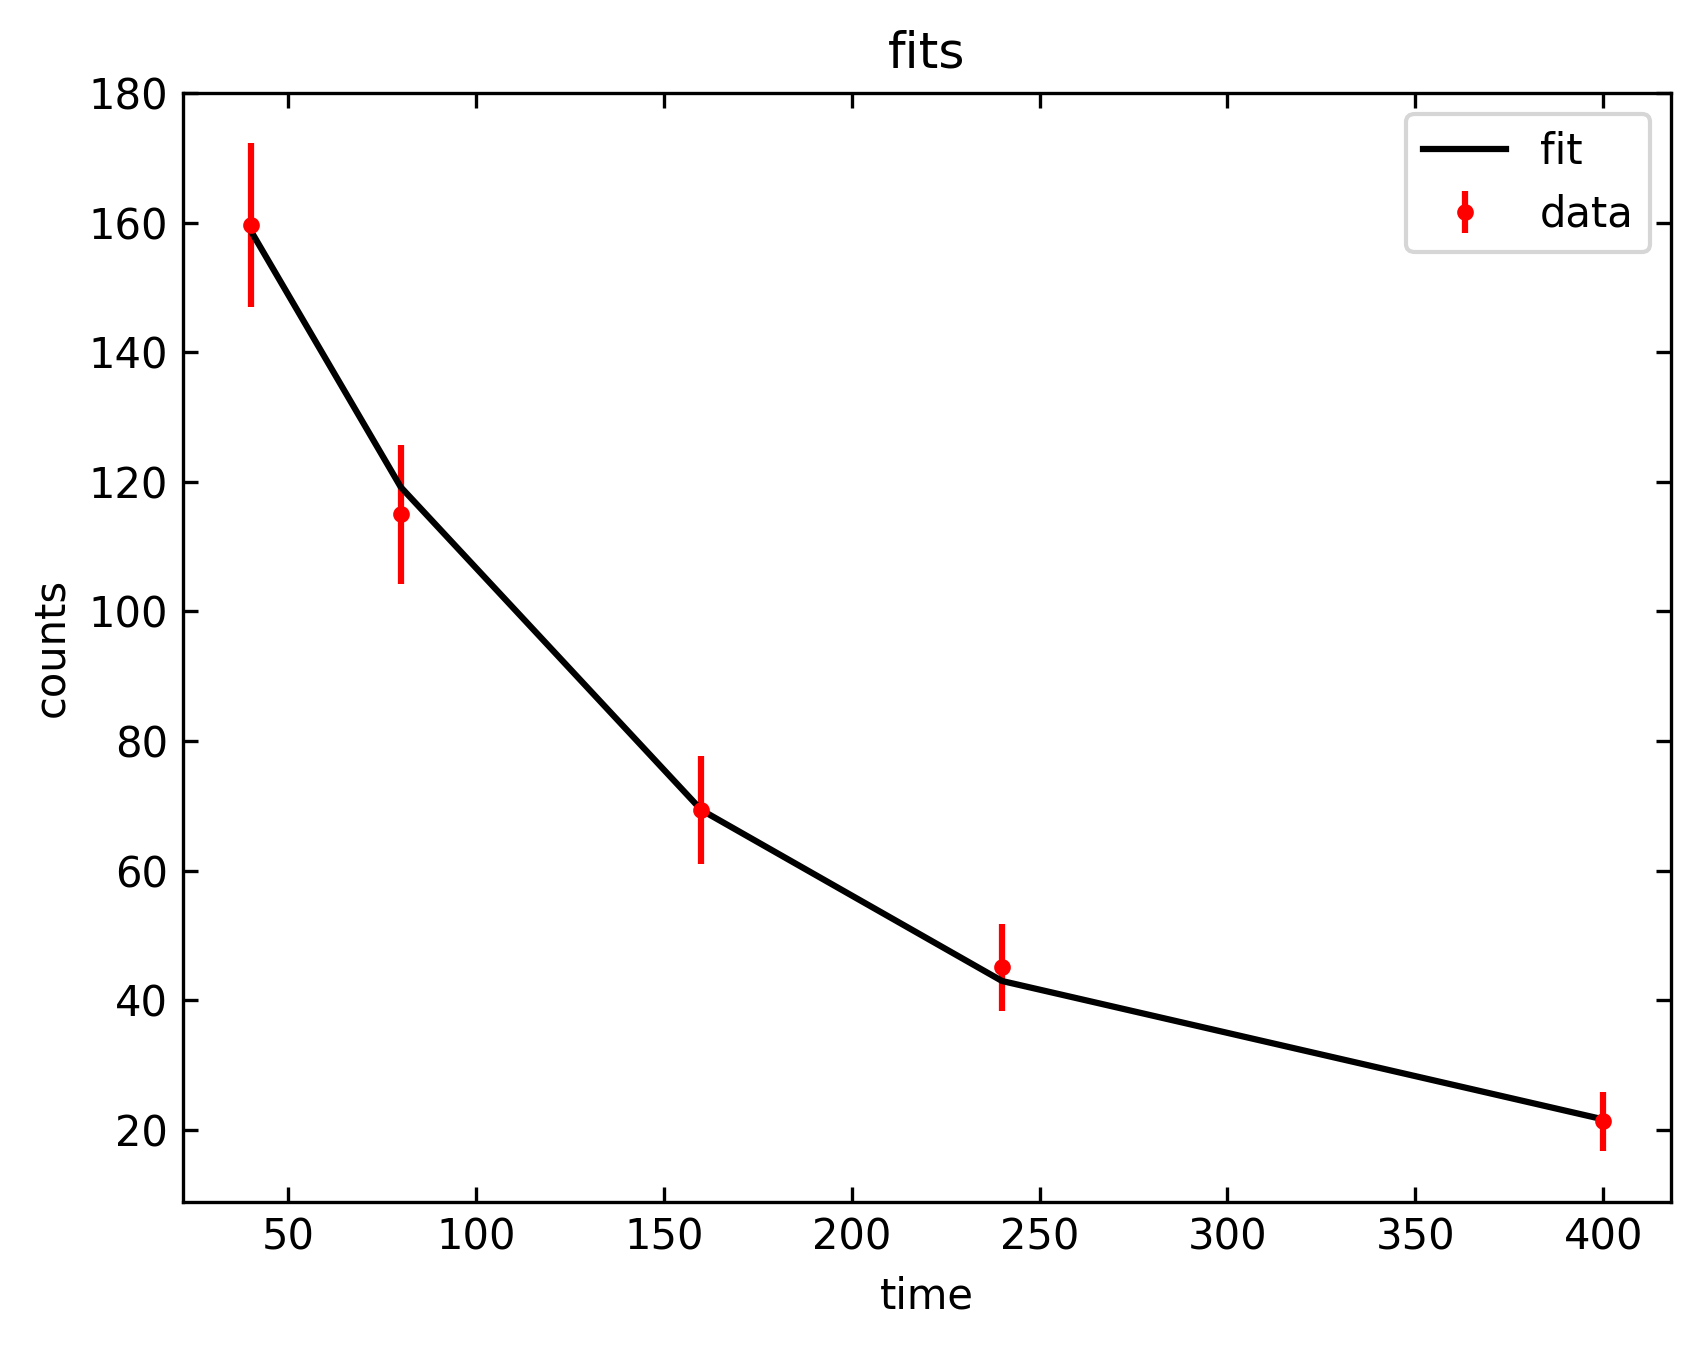

In [32]:
#Now to find the best fit
#Add in something like N0 * np.exp..... try A  = N*exp(-t2/t)+b
N = a[0]
N1 = 200

def counts(t2, t, b): 
    
    a = N1*np.exp(-t2/t)+b
    return a


dof = len(t2) - 2 

#Make some initial guesses for a & b

t_InitialGuess=3
b_InitialGuess=1

popt, pcov = optimize.curve_fit(counts, t2, a, 
                                p0=[t_InitialGuess, b_InitialGuess], sigma=y_err, maxfev=8000) 

t = popt[0] 
b = popt[1]
errors = np.sqrt(np.diag(pcov))
t_err = errors[0] 
b_err = errors[1]

y_fit = counts(t2, t, b)

plot.figure(dpi=300)
plot.errorbar(t2, a, yerr=y_err, fmt='r.', label = "data")
plot.plot(t2, y_fit, c = 'black', marker=None, label = "fit") #draws a fitting line without discrete markers
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.ylabel('counts')
plot.xlabel('time')
plot.title('fits') 
plot.show()

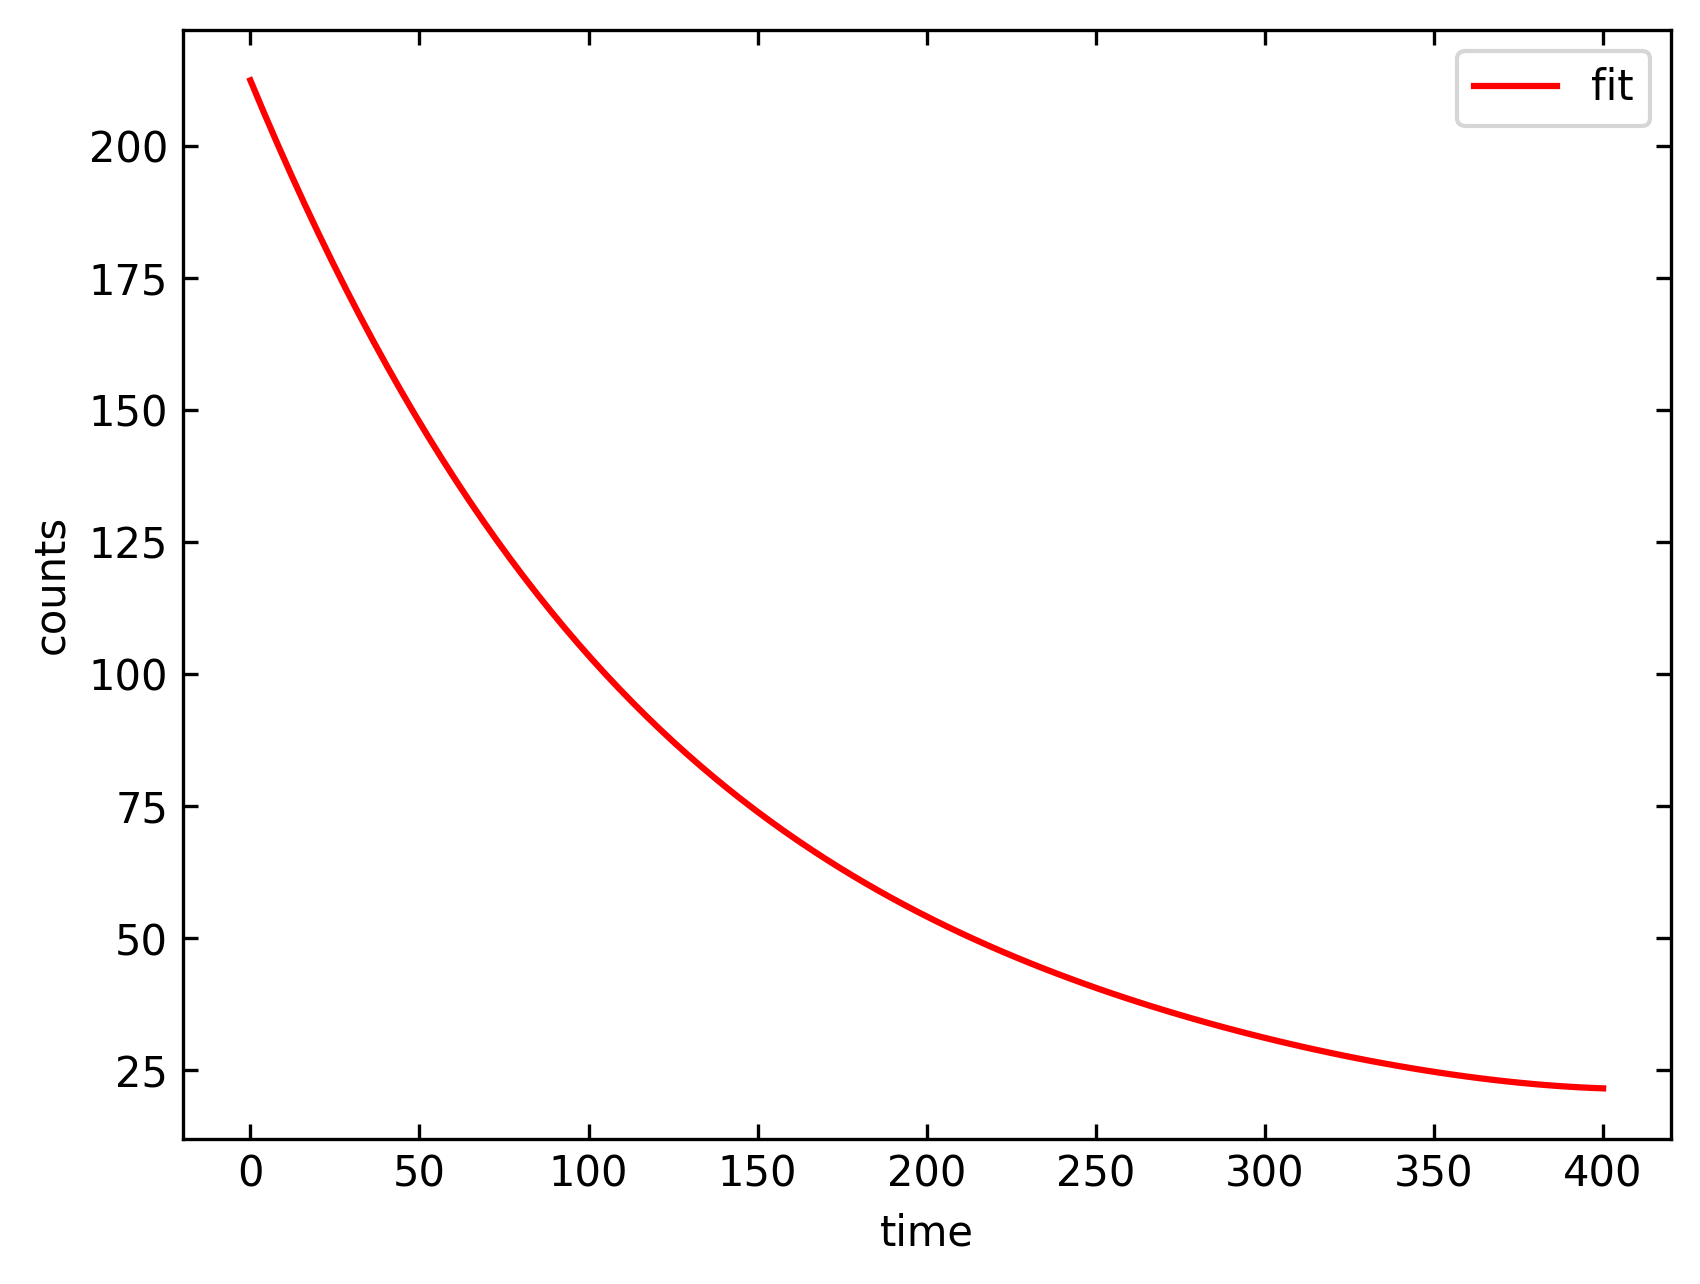

In [33]:
from scipy.interpolate import interp1d, barycentric_interpolate
import pylab


x = t2
y = counts(t2, t, b)
xmax = 400

x0 = np.linspace(0,xmax,100)
y0 = barycentric_interpolate(x, y, x0)
plot.figure(dpi=300)
plot.plot(x0, y0, c='red', label='fit')
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.ylabel('counts')
plot.xlabel('time')
plot.legend()
plot.show()

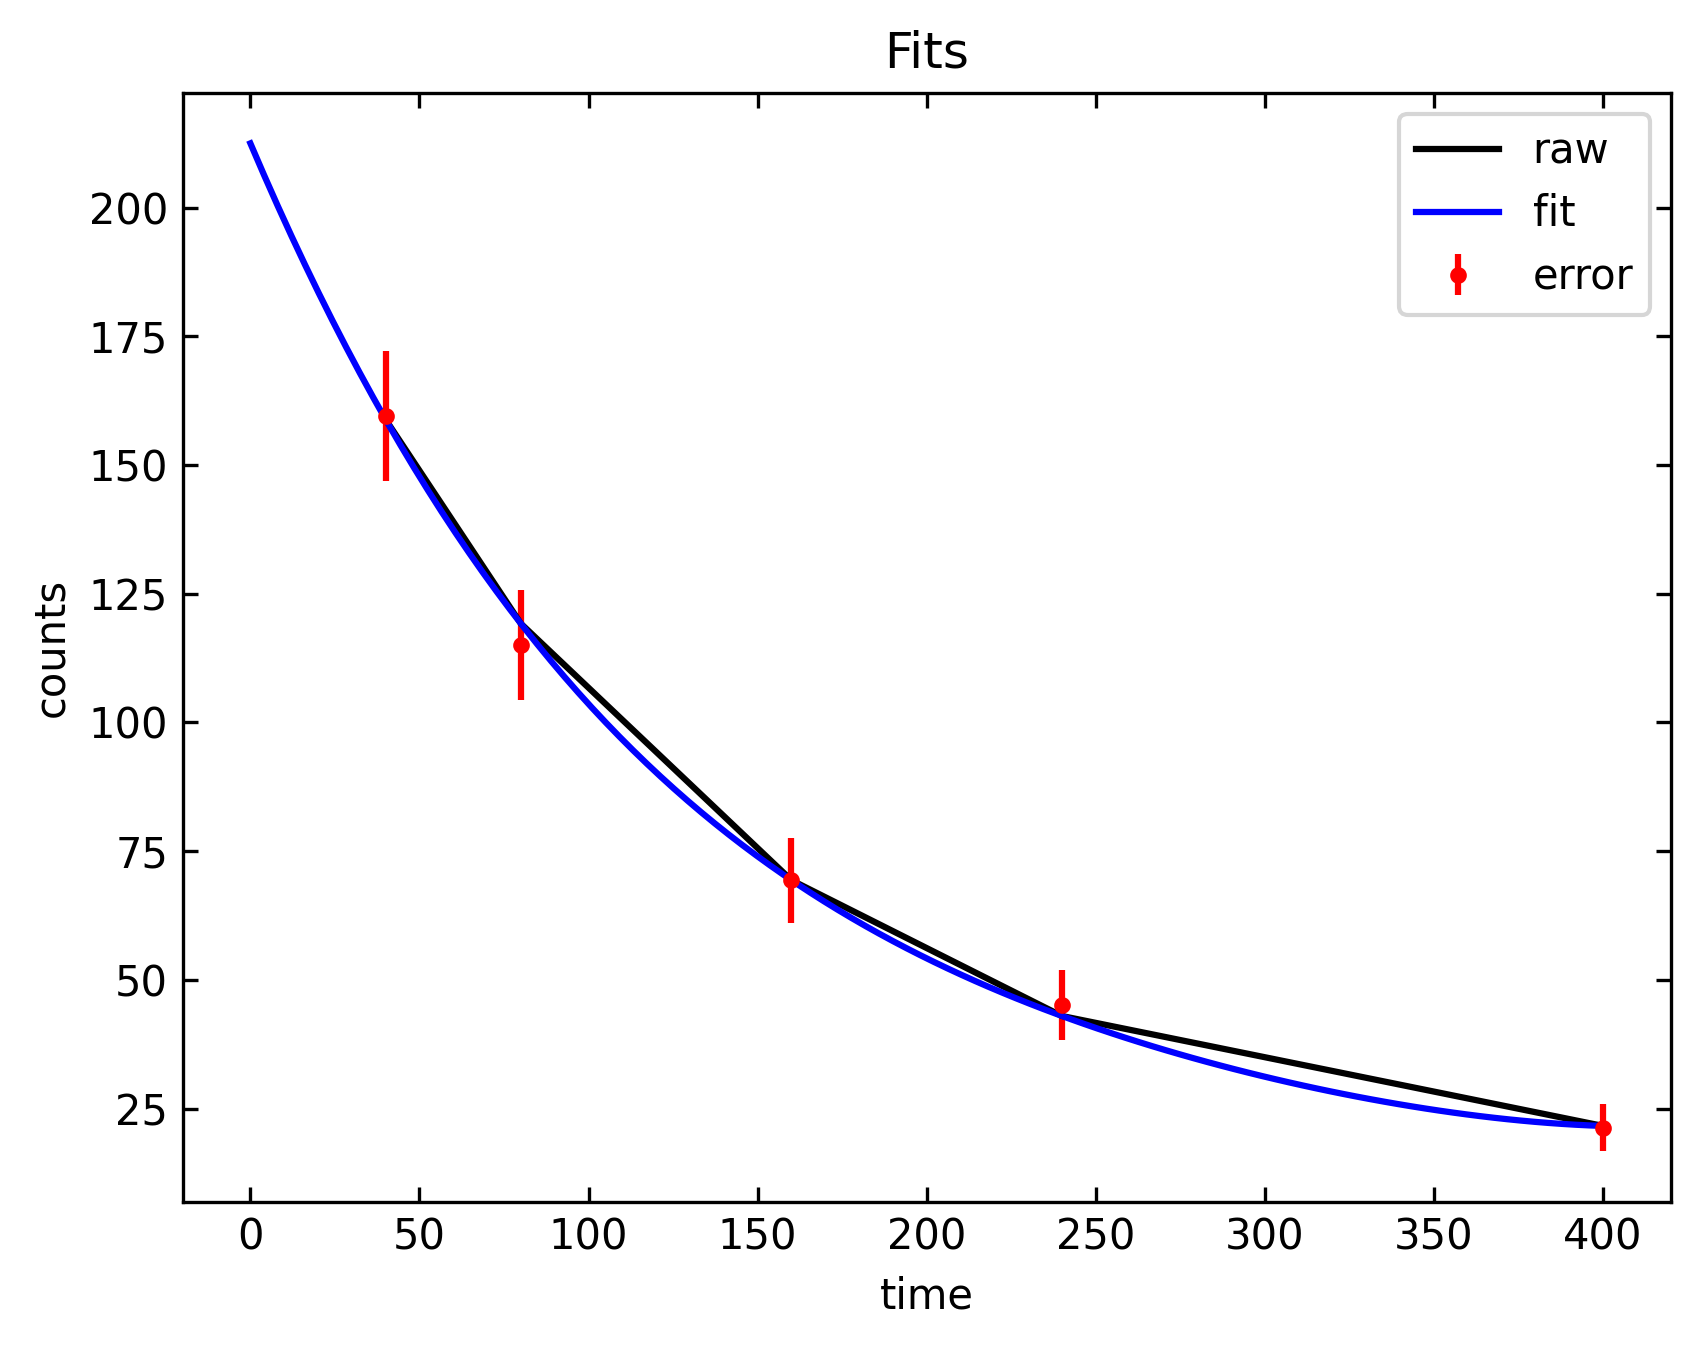

In [34]:
plot.figure(dpi=300)
plot.errorbar(t2, a, yerr=y_err, fmt='r.', label = "error")
plot.plot(t2, y_fit, marker=None, color="black", label = "raw") #draws a fitting line without discrete markers
plot.plot(x0, y0, color="blue" ,label='fit')
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.ylabel('counts')
plot.xlabel('time')
plot.title('Fits') 
plot.show()

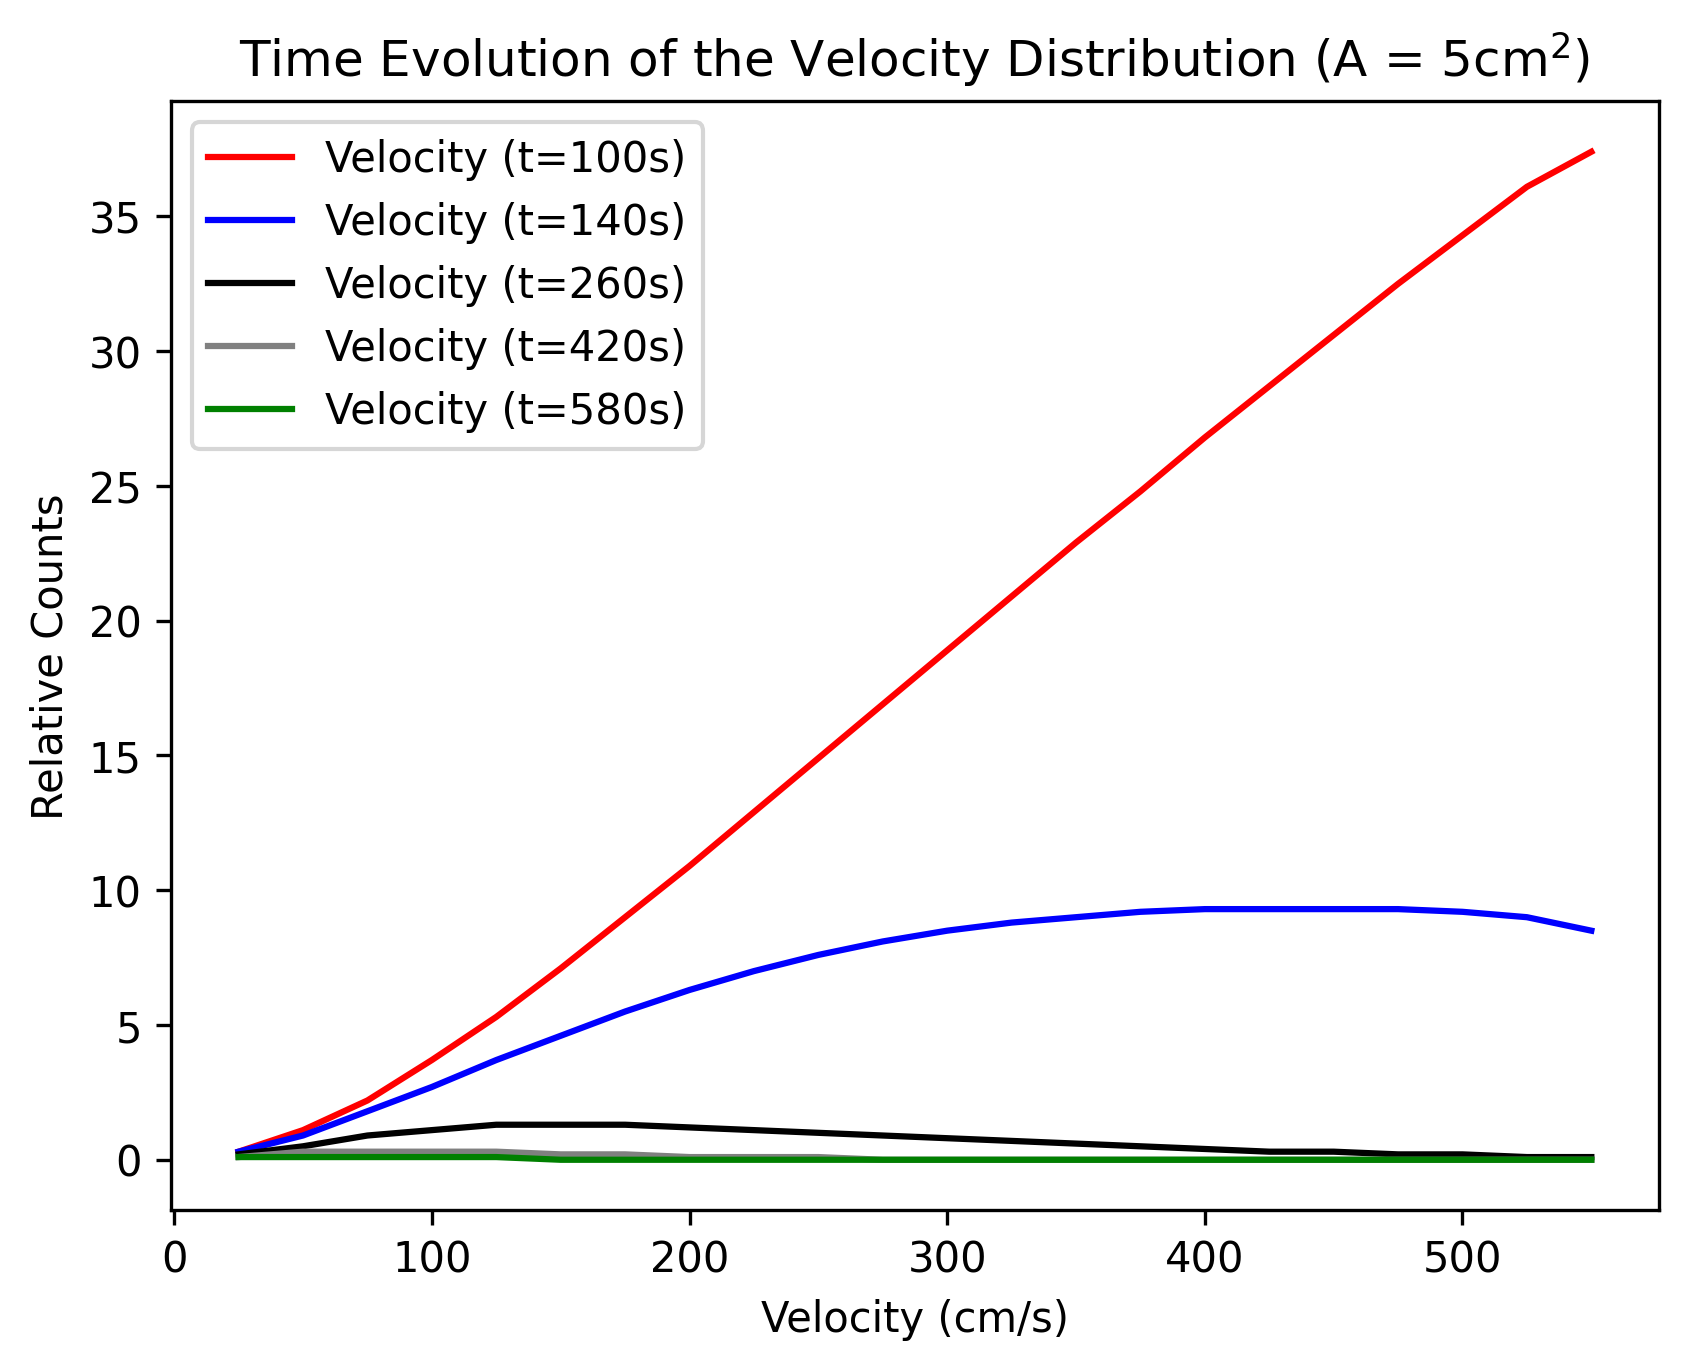

In [35]:
v100 = [0.3, 1.1, 2.2, 3.7, 5.3, 7.1, 9.0, 10.9, 12.9, 14.9, 16.9, 18.9, 20.9, 22.9, 24.8, 26.8, 28.7, 30.6, 32.5, 34.3, 36.1, 37.4]
v100 = np.asarray(v100)
v140 = [0.3, 0.9, 1.8, 2.7, 3.7, 4.6, 5.5, 6.3, 7.0, 7.6, 8.1, 8.5, 8.8, 9.0, 9.2, 9.3, 9.3, 9.3, 9.3, 9.2, 9.0, 8.5]
v140 = np.asarray(v140)
v260 = [0.2, 0.5, 0.9, 1.1, 1.3, 1.3, 1.3, 1.2, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1]
v260 = np.asarray(v260)
v420 = [0.1, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
v420 = np.asarray(v420)
v580 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]






v580 = np.asarray(v580)

RC = [25.0, 50.0, 75.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0, 250.0, 275.0, 300.0, 325.0, 350.0, 375.0, 400.0, 425.0, 450.0, 475.0, 500.0, 525.0, 550.0]

plot.figure(dpi=300)
plot.plot(RC, v100, c='red', marker=None, label = "Velocity (t=100s)",)
plot.plot(RC, v140,  c='blue',marker=None, label = "Velocity (t=140s)",)
plot.plot(RC, v260,  c='black',marker=None, label = "Velocity (t=260s)",)
plot.plot(RC, v420,  c='gray',marker=None, label = "Velocity (t=420s)",)
plot.plot(RC, v580,  c='green',marker=None, label = "Velocity (t=580s)",)
plot.legend()
plot.ylabel('Relative Counts')
plot.xlabel('Velocity (cm/s)')
plot.title('Time Evolution of the Velocity Distribution (A = 5cm$^2$)')
plot.show()

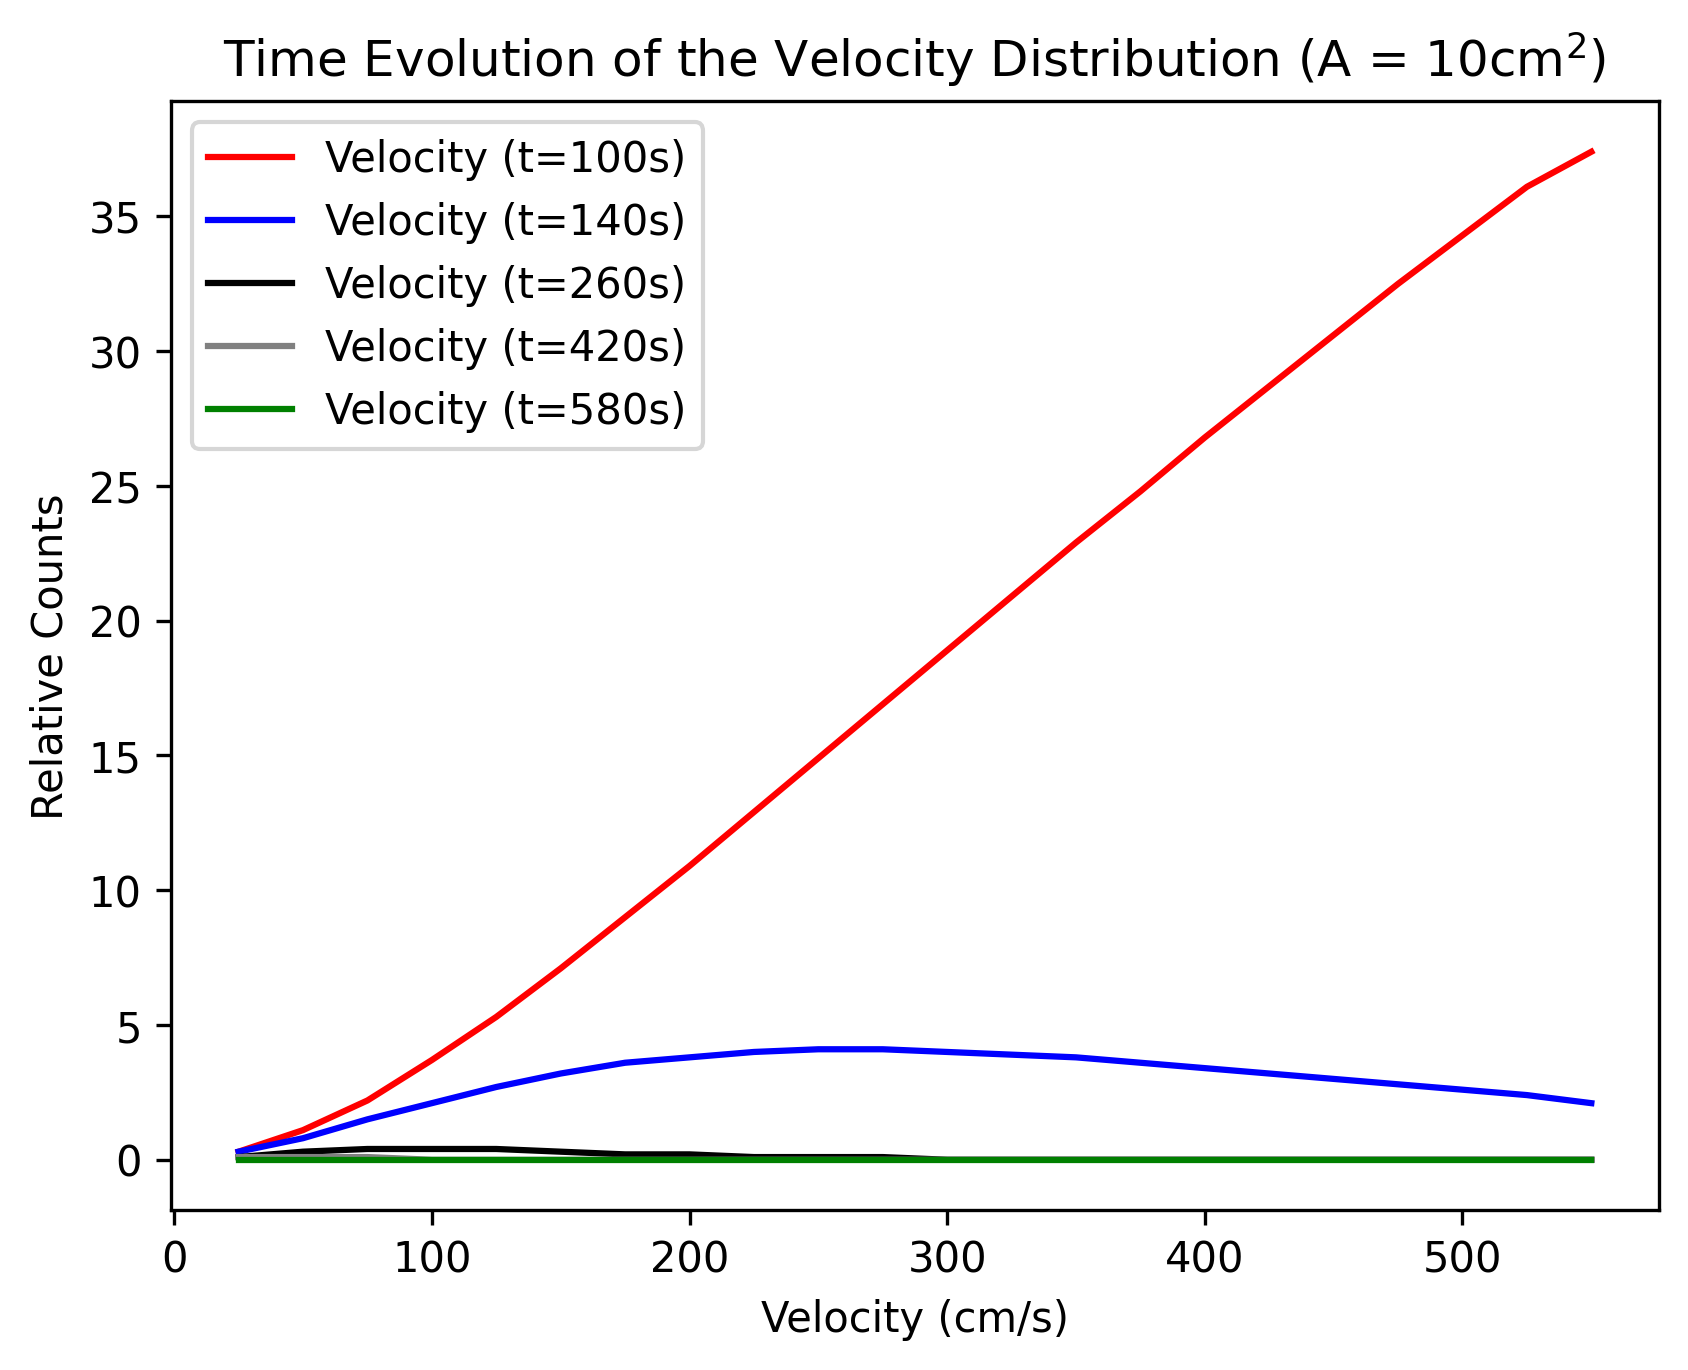

In [36]:
v100 = [0.3, 1.1, 2.2, 3.7, 5.3, 7.1, 9.0, 10.9, 12.9, 14.9, 16.9, 18.9, 20.9, 22.9, 24.8, 26.8, 28.7, 30.6, 32.5, 34.3, 36.1, 37.4]
v100 = np.asarray(v100)
v140 = [0.3, 0.8, 1.5, 2.1, 2.7, 3.2, 3.6, 3.8, 4.0, 4.1, 4.1, 4.0, 3.9, 3.8, 3.6, 3.4, 3.2, 3.0, 2.8, 2.6, 2.4, 2.1]
v140 = np.asarray(v140)
v260 = [0.1, 0.3, 0.4, 0.4, 0.4, 0.3, 0.2, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
v260 = np.asarray(v260)
v420 = [0.1, 0.1, 0.1, 0.0 , 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
v420 = np.asarray(v420)
v580 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]






v580 = np.asarray(v580)

RC = [25.0, 50.0, 75.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0, 250.0, 275.0, 300.0, 325.0, 350.0, 375.0, 400.0, 425.0, 450.0, 475.0, 500.0, 525.0, 550.0]

plot.figure(dpi=300)
plot.plot(RC, v100, c='red', marker=None, label = "Velocity (t=100s)",)
plot.plot(RC, v140,  c='blue',marker=None, label = "Velocity (t=140s)",)
plot.plot(RC, v260,  c='black',marker=None, label = "Velocity (t=260s)",)
plot.plot(RC, v420,  c='gray',marker=None, label = "Velocity (t=420s)",)
plot.plot(RC, v580,  c='green',marker=None, label = "Velocity (t=580s)",)
plot.legend()
plot.ylabel('Relative Counts')
plot.xlabel('Velocity (cm/s)')
plot.title('Time Evolution of the Velocity Distribution (A = 10cm$^2$)')
plot.show()

-900

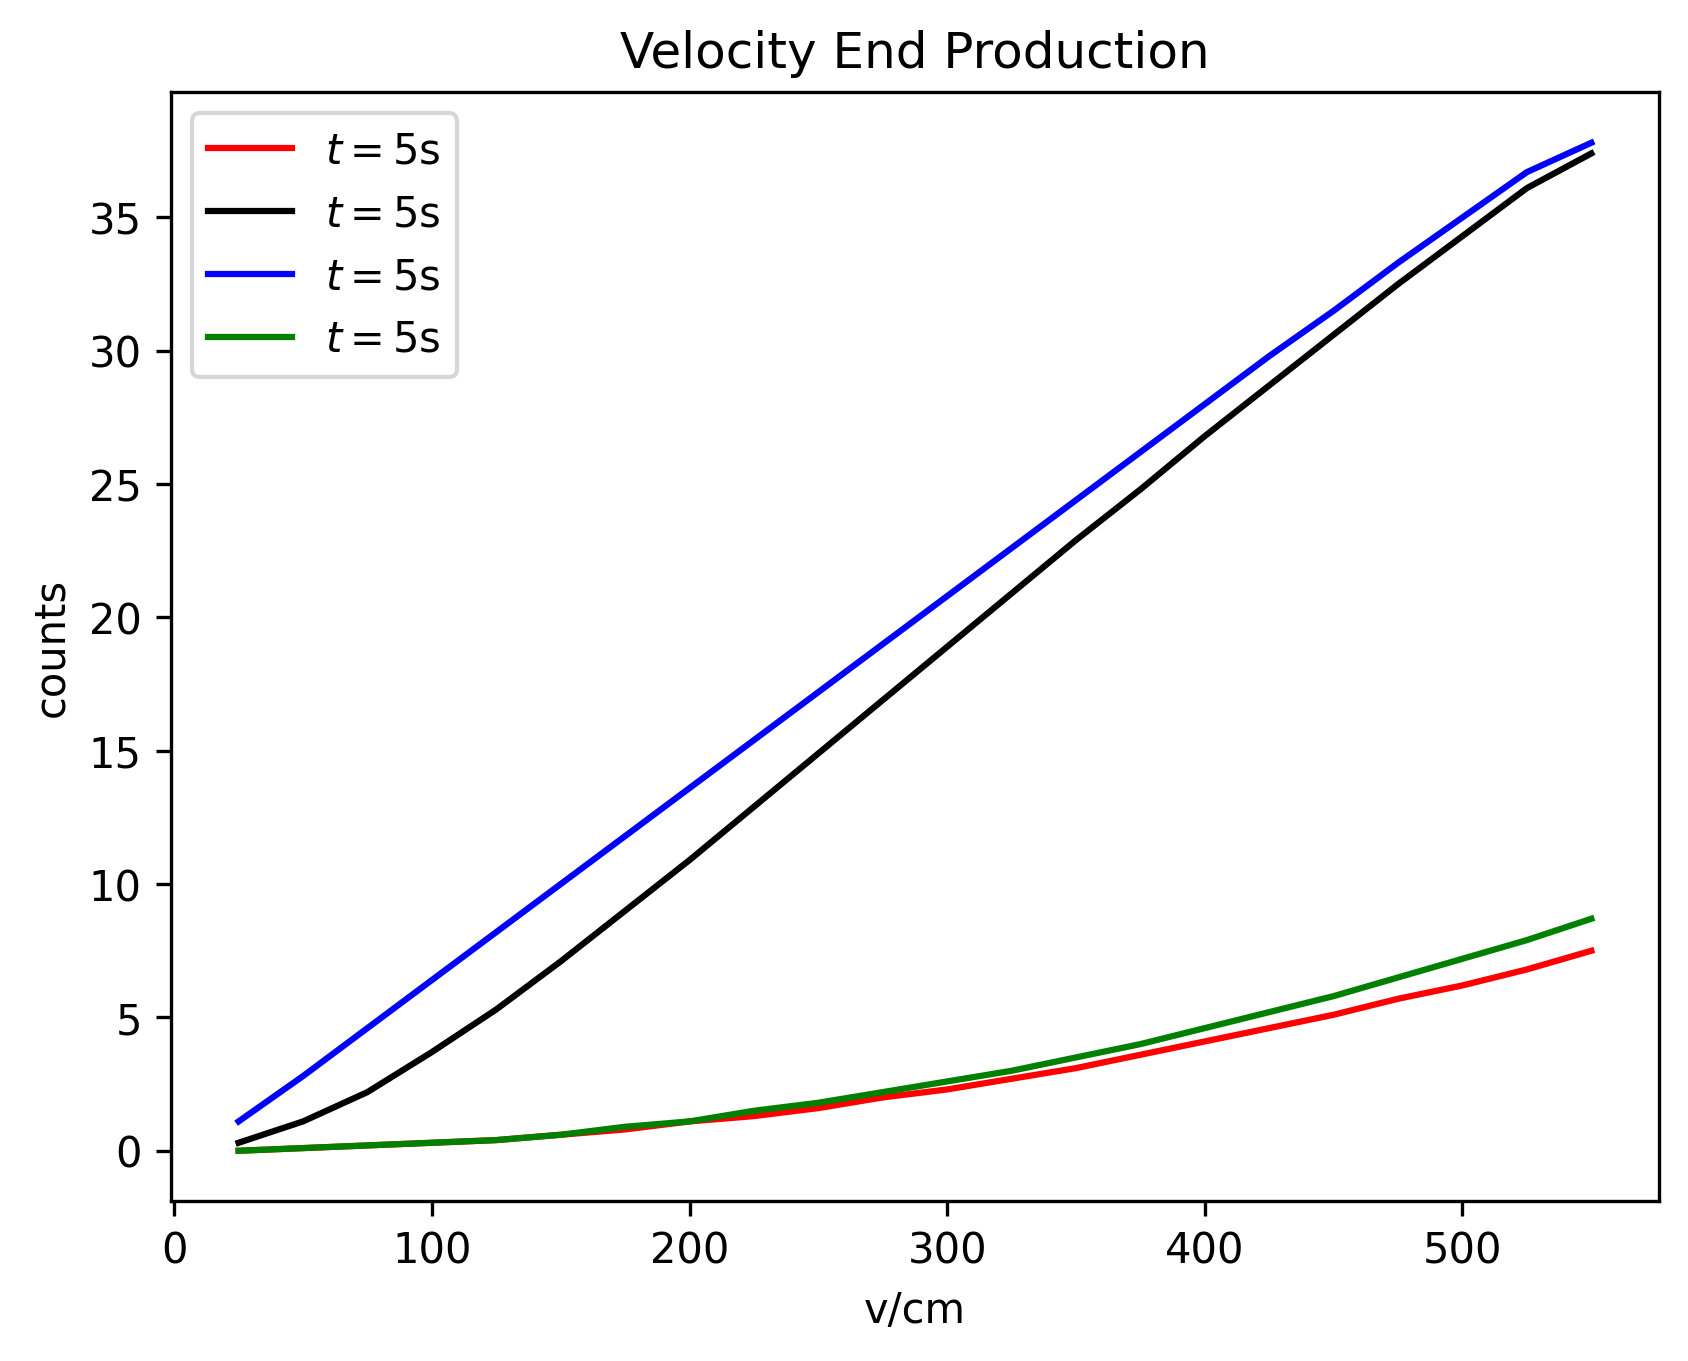

In [37]:
t5 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.1, 1.3, 1.6, 2.0, 2.3, 2.7, 3.1, 3.6, 4.1, 4.6, 5.1, 5.7, 6.2, 6.8, 7.5]
np.asarray(t5)
t100 = [0.3, 1.1, 2.2, 3.7, 5.3, 7.1, 9.0, 10.9, 12.9, 14.9, 16.9, 18.9, 20.9, 22.9, 24.8, 26.8, 28.7, 30.6, 32.5, 34.3, 36.1, 37.4]
np.asarray(t100)
t3000 = [1.1, 2.8, 4.6, 6.4, 8.2, 10.0, 11.8, 13.6, 15.4, 17.2, 19.0, 20.8, 22.6, 24.4, 26.2, 28.0, 29.8, 31.5, 33.3, 35.0, 36.7, 37.8]
np.asarray(t3000)
vsquare = [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.9, 1.1, 1.5, 1.8, 2.2, 2.6, 3.0, 3.5, 4.0, 4.6, 5.2, 5.8, 6.5, 7.2, 7.9, 8.7]
np.asarray(vsquare)


plot.figure(dpi=300)
plot.plot(v, t5, marker=None, color='red', label='$t=5$s')
plot.plot(v, t100, marker=None, color='black', label='$t=5$s')
plot.plot(v, t3000, marker=None, color='blue', label='$t=5$s')
plot.plot(v, vsquare, marker=None, color='green', label='$t=5$s')
plot.xlabel('v/cm')
plot.ylabel('counts')
plot.legend()
plot.title('Velocity End Production')
plot.show()



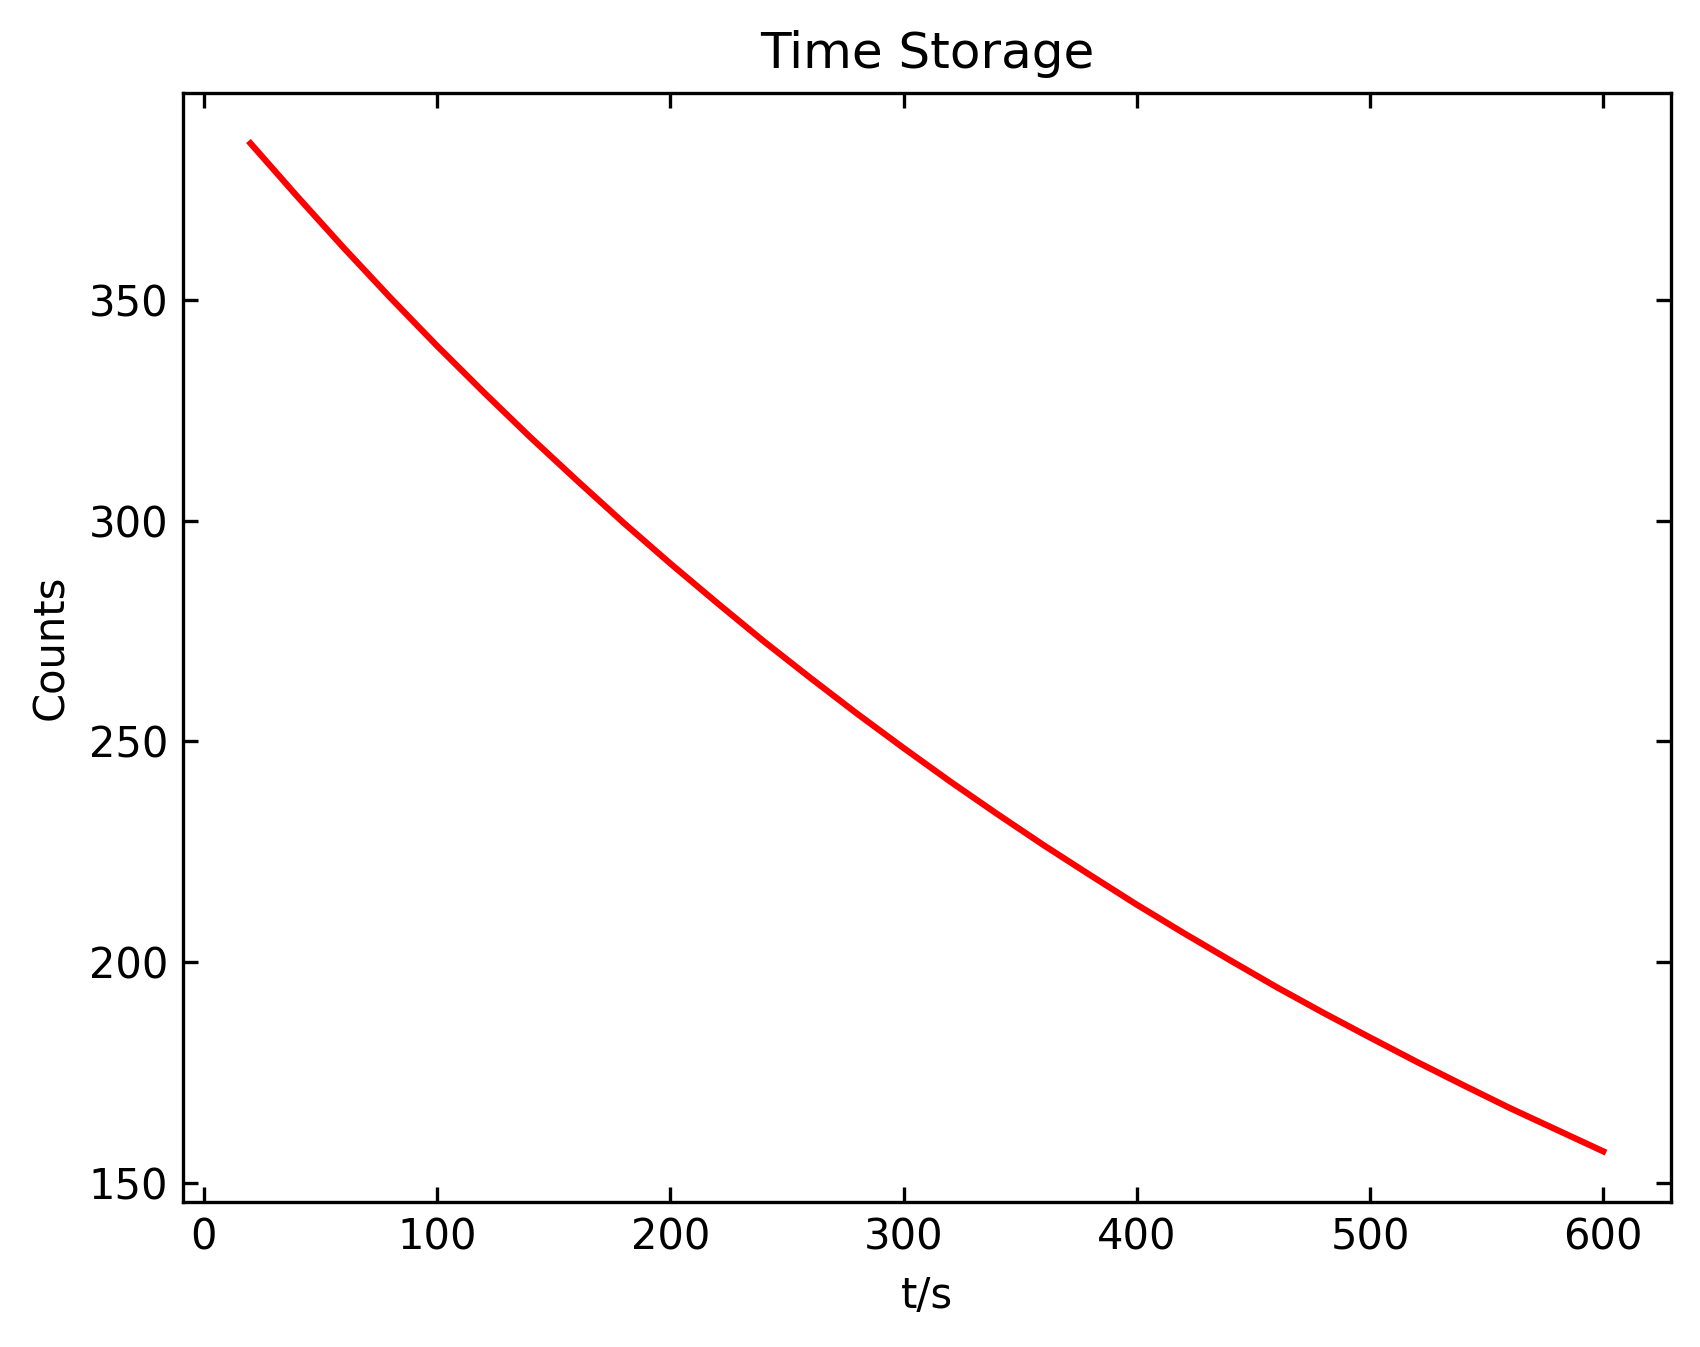

In [38]:
tstorage = [
    20.0, 40.0, 60.0,
    80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 240.0, 260.0,
    280.0, 300.0, 320.0, 340.0, 360.0, 380.0, 400.0, 420.0, 440.0, 460.0,
    480.0, 500.0, 520.0, 540.0, 560.0, 580.0, 600.0
]
tstorage = np.asarray(tstorage)
vsumpartial = [
    385.5, 373.5, 361.8, 350.5, 339.6, 329.1, 318.9, 309.1, 299.5, 290.3,
    281.4, 272.7, 264.4, 256.3, 248.5, 240.9, 233.6, 226.5, 219.7, 213.0,
    206.6, 200.4, 194.3, 188.5, 182.9, 177.4, 172.1, 166.9, 162.0, 157.1
]
vsumpartial = np.asarray(vsumpartial)

plot.figure(dpi=300)
plot.plot(tstorage, vsumpartial, c='red', marker=None)
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('t/s')
plot.ylabel('Counts')
plot.title('Time Storage')
plot.show()

There's two 'velocity end production' graphs, and they use the same data, but they have different plots?

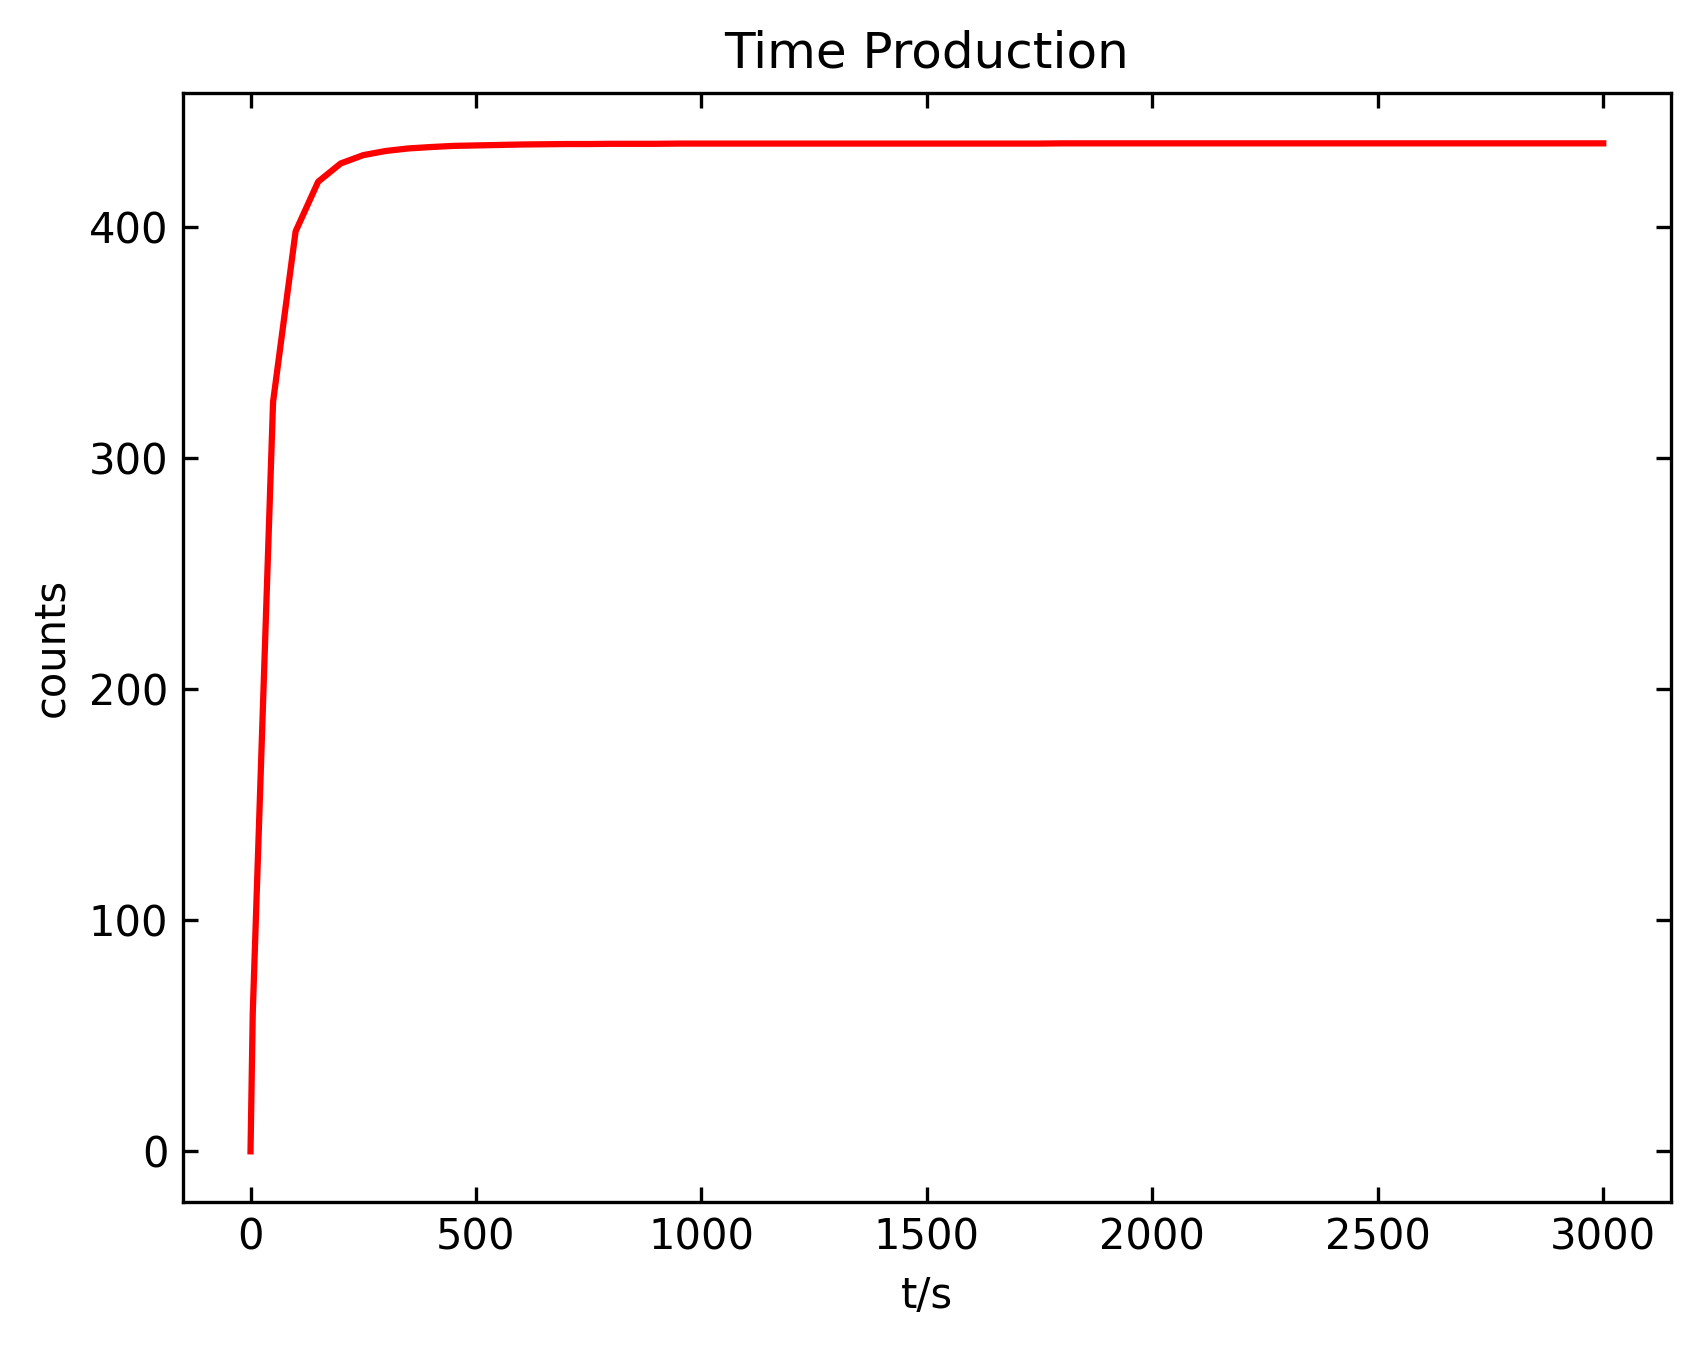

In [39]:
vsum = [
    0.0, 60.1, 324.2, 398.0, 419.5, 427.4, 431.0, 432.8, 433.9, 434.5, 
    435.0, 435.2, 435.4, 435.6, 435.7, 435.8, 435.8, 435.9, 435.9, 435.9, 
    436.0, 436.0, 436.0, 436.0, 436.0, 436.0, 436.0, 436.0, 436.0, 436.0, 
    436.0, 436.0, 436.0, 436.0, 436.0, 436.0, 436.0, 436.1, 436.1, 436.1, 
    436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 
    436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 436.1, 
    436.1, 436.1
]
vsum = np.asarray(vsum)

t_total = [
    0.0, 5.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0,
    450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0,
    950.0, 1000.0, 1050.0, 1100.0, 1150.0, 1200.0, 1250.0, 1300.0, 1350.0,
    1400.0, 1450.0, 1500.0, 1550.0, 1600.0, 1650.0, 1700.0, 1750.0, 1800.0,
    1850.0, 1900.0, 1950.0, 2000.0, 2050.0, 2100.0, 2150.0, 2200.0, 2250.0,
    2300.0, 2350.0, 2400.0, 2450.0, 2500.0, 2550.0, 2600.0, 2650.0, 2700.0,
    2750.0, 2800.0, 2850.0, 2900.0, 2950.0, 3000.0
]
t_total = np.asarray(t_total)

plot.figure(dpi=300)
plot.plot(t_total, vsum, c='red', marker=None)
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('t/s')
plot.ylabel('counts')
plot.title('Time Production')
plot.show()

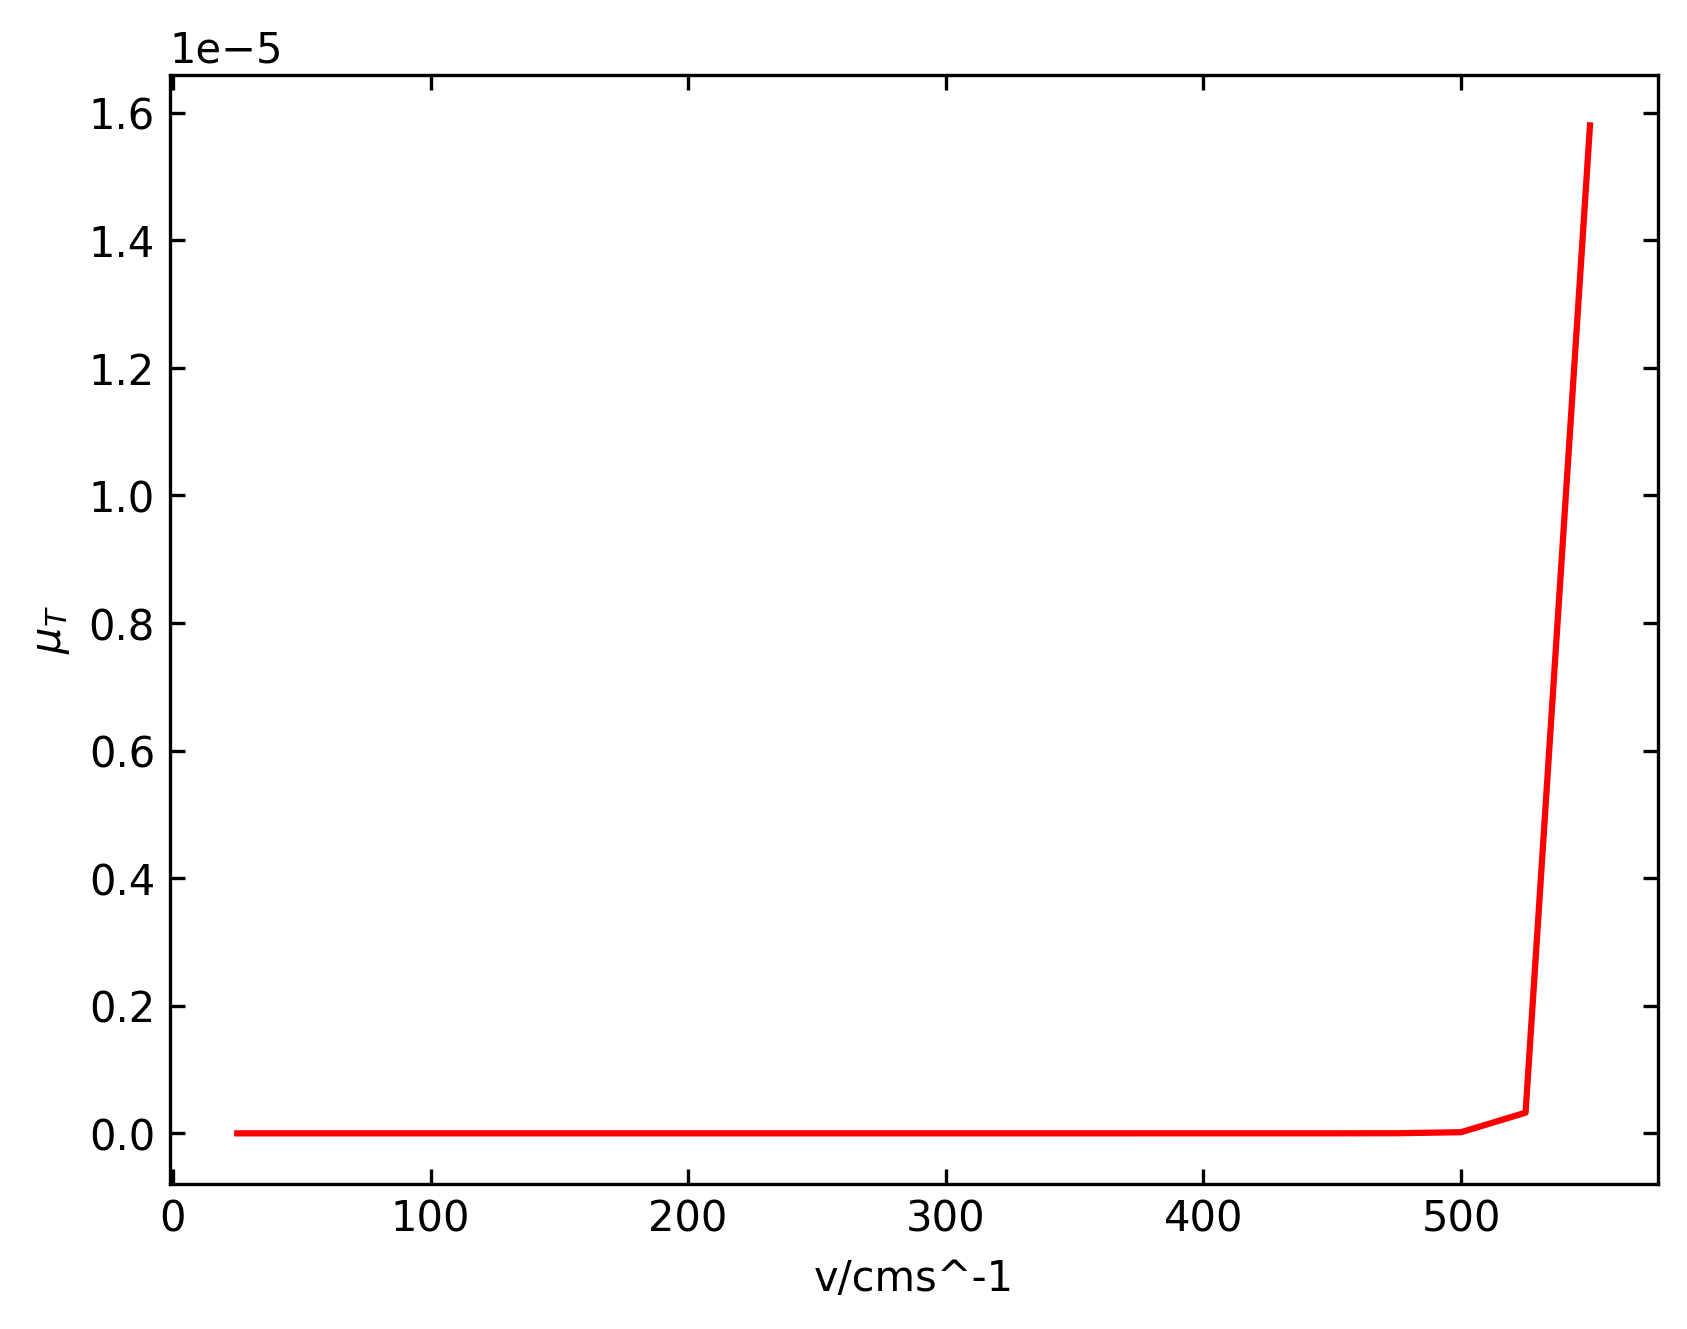

In [40]:
import numpy as np
cosTheta = [0.000, 0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975]
#velocity data for integral fits
vInt = np.linspace(25, 550, 22)

mu_T = [9.06414*10**-18, 3.88*10**-17, 9.8*10**-17, 2.05*10**-16, 3.99*10**-16, 7.55*10**-16, 1.44*10**-15, 2.81*10**-15, 5.73*10**-15, 1.24*10**-14, 2.85*10**-14, 7.14*10**-14, 1.96*10**-13, 5.98*10**-13, 2.07*10**-12, 8.22*10**-12, 3.87*10**-11, 2.24*10**-10, 1.68*10**-9, 1.79*10**-8, 3.24*10**-7, 1.58*10**-5]

plot.figure(dpi=300)
plot.plot(vInt, mu_T, c='red',marker=None)
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('v/cms^-1')
plot.ylabel('$\mu_T$')
plot.show()

In [41]:
def mu_wall(E):
    return 2 * f *(V_nev / E * np.arcsin(np.sqrt(E / V_nev)) - np.sqrt(V_nev / E - 1))
    
#Calculates all E(nev) values directly from equation.
#They round to the spreadsheet values, so I'll continue.

#Sets empty array to eVal
eVal = []

#Creating a for loop to calculate exact values and appending them to
#eVal
for i in v:
    e2 = 9.39565/2/(2.9979)**2*0.001*i**2
    eVal.append(e2)

#Just a test. Will figure a way to make it a bit easier to 
#call a specific value that isn't just [0]
print(mu_wall(eVal[0]))

    
#print(mu_wall(e2[0]))



6.028597198982766e-07


In [42]:
#This data was taken from an image using automeris.io
#The data couldn't be found through Gitlab so this had to do.

Tstore = []
CountsScaled = []

with open('Run2782.csv', 'r') as ifile:
    data = csv.reader(ifile)
    
    counter = 0
    for row in data:
        if counter == 1:
            
            Tstore.append(float(row[0]))
            CountsScaled.append(float(row[1]))

            
        else:
            counter+=1
            
Tstore = np.asarray(Tstore)
CountsScaled = np.asarray(CountsScaled)



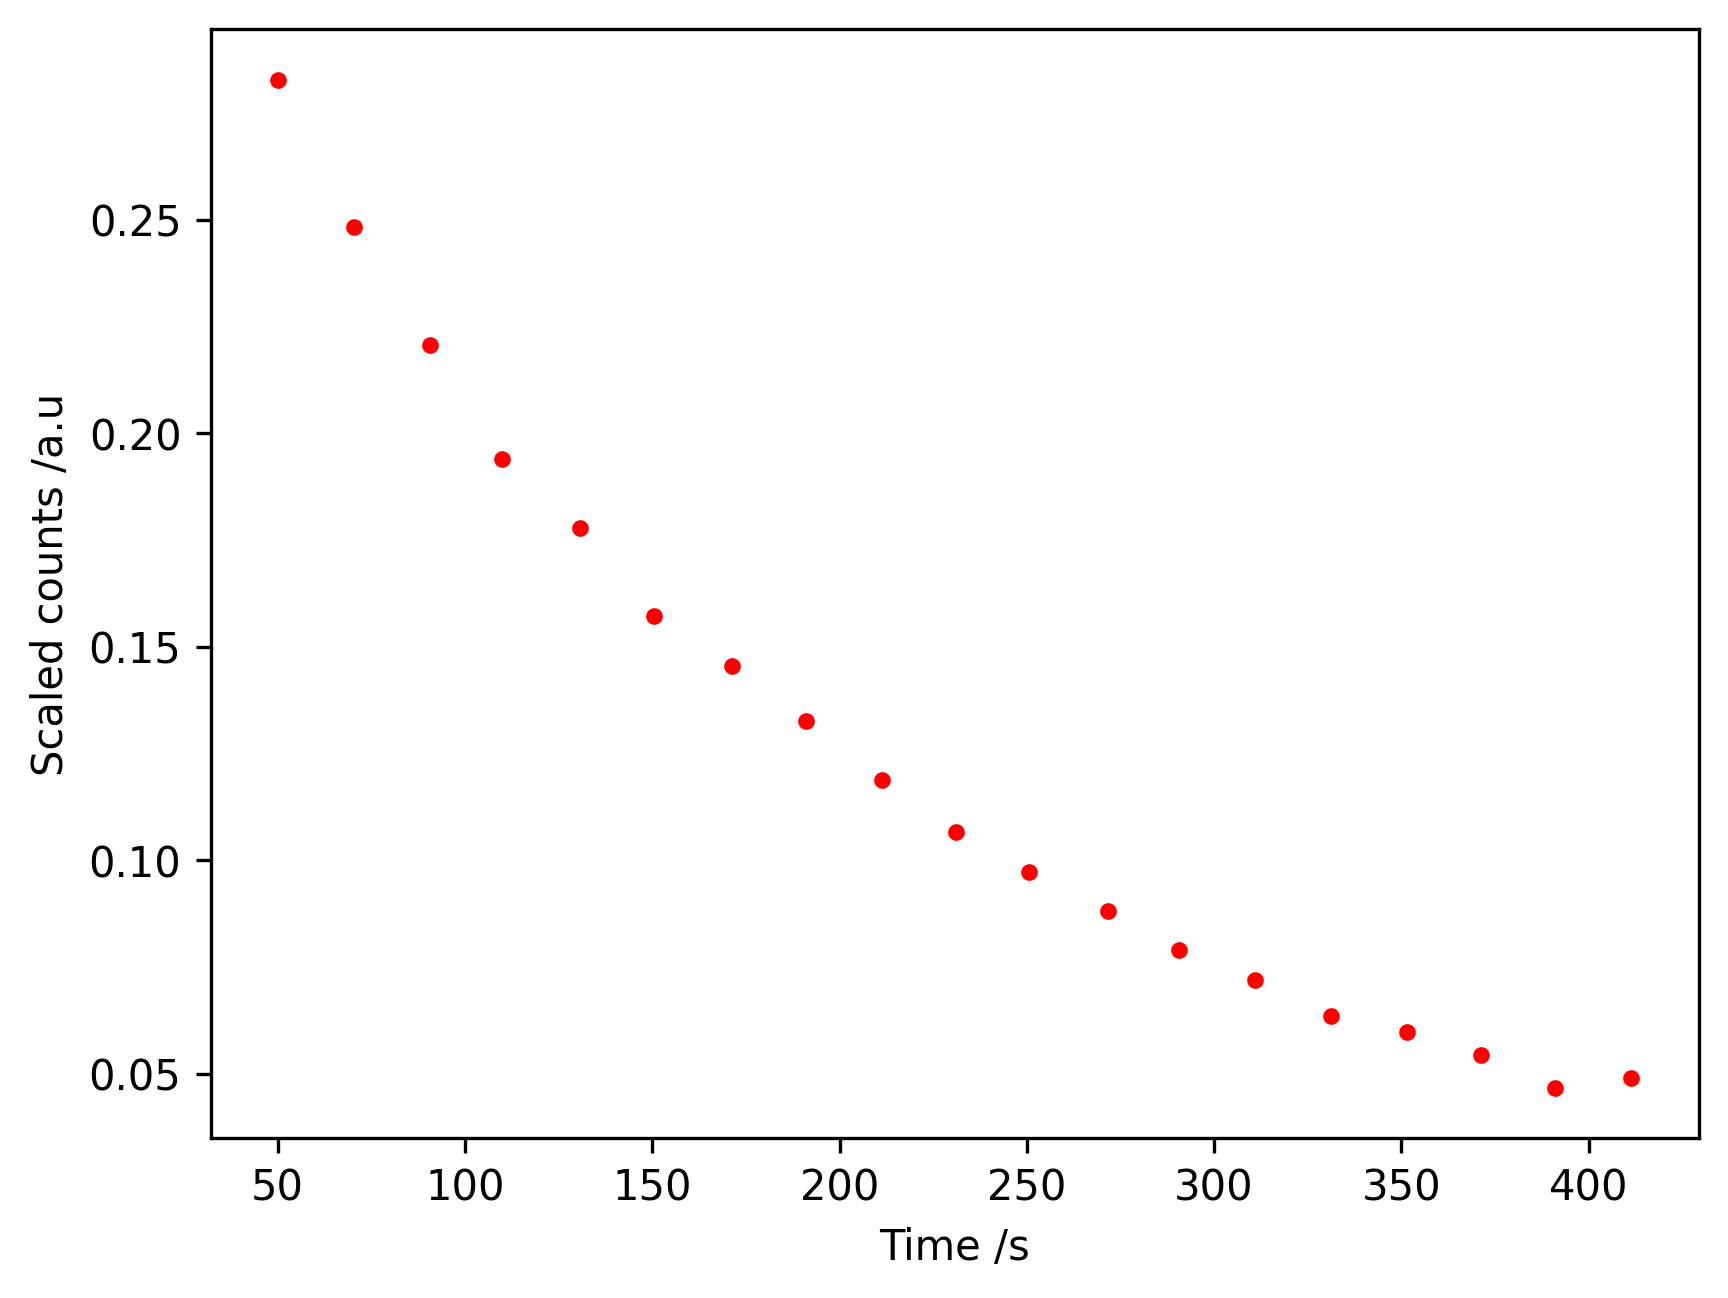

In [43]:
#Plot the raw data points taken

plot.figure(dpi=300)
plot.scatter(Tstore, CountsScaled, c='red', marker=".")
plot.xlabel('Time /s')
plot.ylabel('Scaled counts /a.u')
plot.show()

C:\Users\nelso\AppData\Local\Temp\ipykernel_13292\2971352109.py:20: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = optimize.curve_fit(ScaCount, Tstore, CountsScaled,


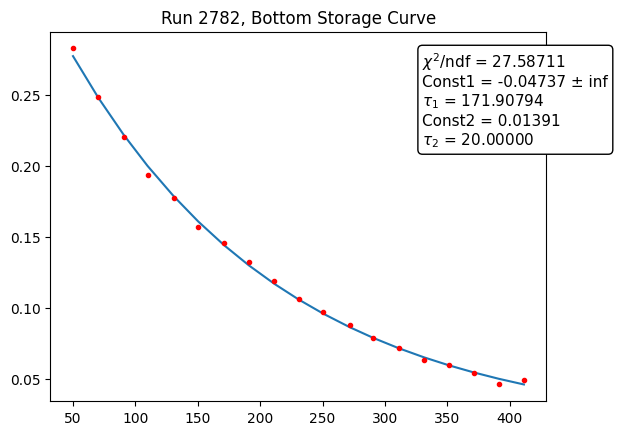

In [44]:
from scipy.stats import chi2
N2 = 0.4
Counts_err = np.sqrt(CountsScaled)

def ScaCount(Tstore, t, b, c, t2): 
    
    CountsScaled = N2*np.exp(-(Tstore)/t)+b * np.exp(-(Tstore)/t)+c
    return CountsScaled


dof = len(Tstore) - 2 

#Make some initial guesses for a & b

t_InitialGuess=400
b_InitialGuess=0.35
c_InitialGuess=0.35
t2_InitialGuess = 20

popt, pcov = optimize.curve_fit(ScaCount, Tstore, CountsScaled, 
                                p0=[t_InitialGuess, b_InitialGuess, c_InitialGuess, t2_InitialGuess], sigma=Counts_err, maxfev=9000) 

t = popt[0] 
b = popt[1]
c = popt[2]
t2 = popt[3]
errors = np.sqrt(np.diag(pcov))
t_err = errors[0] 
b_err = errors[1]
c_err = errors[2]
t2_err = errors[3]

y_fit = ScaCount(Tstore, t, b, c, t2)

#plot.figure(dpi=300)
#plot.errorbar(Tstore, CountsScaled, yerr=b_err, fmt='r.', label = "data")
#plot.plot(Tstore, y_fit, marker=None, label = "fit") #draws a fitting line without discrete markers
#plot.ylabel('counts')
#plot.xlabel('time')
#plot.title('fits') 

def chisq(dof, alpha=0.05):
    return chi2.ppf(1 - alpha, dof)

alpha = 0.05
chi2 = chisq(dof, alpha)

textstr = '\n'.join((
    r'$\chi^2$/ndf = {:.5f}'.format(chi2),
    r'Const1 = {:.5f} ± {:.2f}'.format(b, b_err),
    r'$\tau_1$ = {:.5f}'.format(t),
    r'Const2 = {:.5f}'.format(c),
    r'$\tau_2$ = {:.5f}'.format(t2)))
fig, ax = plot.subplots()


ax.errorbar(Tstore, CountsScaled, yerr=b_err, fmt='r.', label = "data")
ax.plot(Tstore, y_fit)
ax.set_title('Run 2782, Bottom Storage Curve')
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
             
plot.show()

In [45]:
TstoreTOP = []
TstoreBOT = []
CountsTOP = []
CountsBOT = []

with open('StorageCountBOTTOM.csv', 'r') as ifile:
    data = csv.reader(ifile)
    
    counter = 0
    for row in data:
        if counter == 1:
            
            TstoreBOT.append(float(row[0]))
            CountsBOT.append(float(row[1]))

            
        else:
            counter+=1
            

with open('StorageCountTOP.csv', 'r') as ifile:
    data = csv.reader(ifile)
    
    counter = 0
    for row in data:
        if counter == 1:
            
            TstoreTOP.append(float(row[0]))
            CountsTOP.append(float(row[1]))

            
        else:
            counter+=1
            
                  
TstoreTOP = np.asarray(TstoreTOP)
CountsTOP = np.asarray(CountsTOP)
TstoreBOT = np.asarray(TstoreBOT)
CountsBOT = np.asarray(CountsBOT)

Ttop_err = np.sqrt(CountsTOP)
Tbot_err = np.sqrt(CountsBOT)

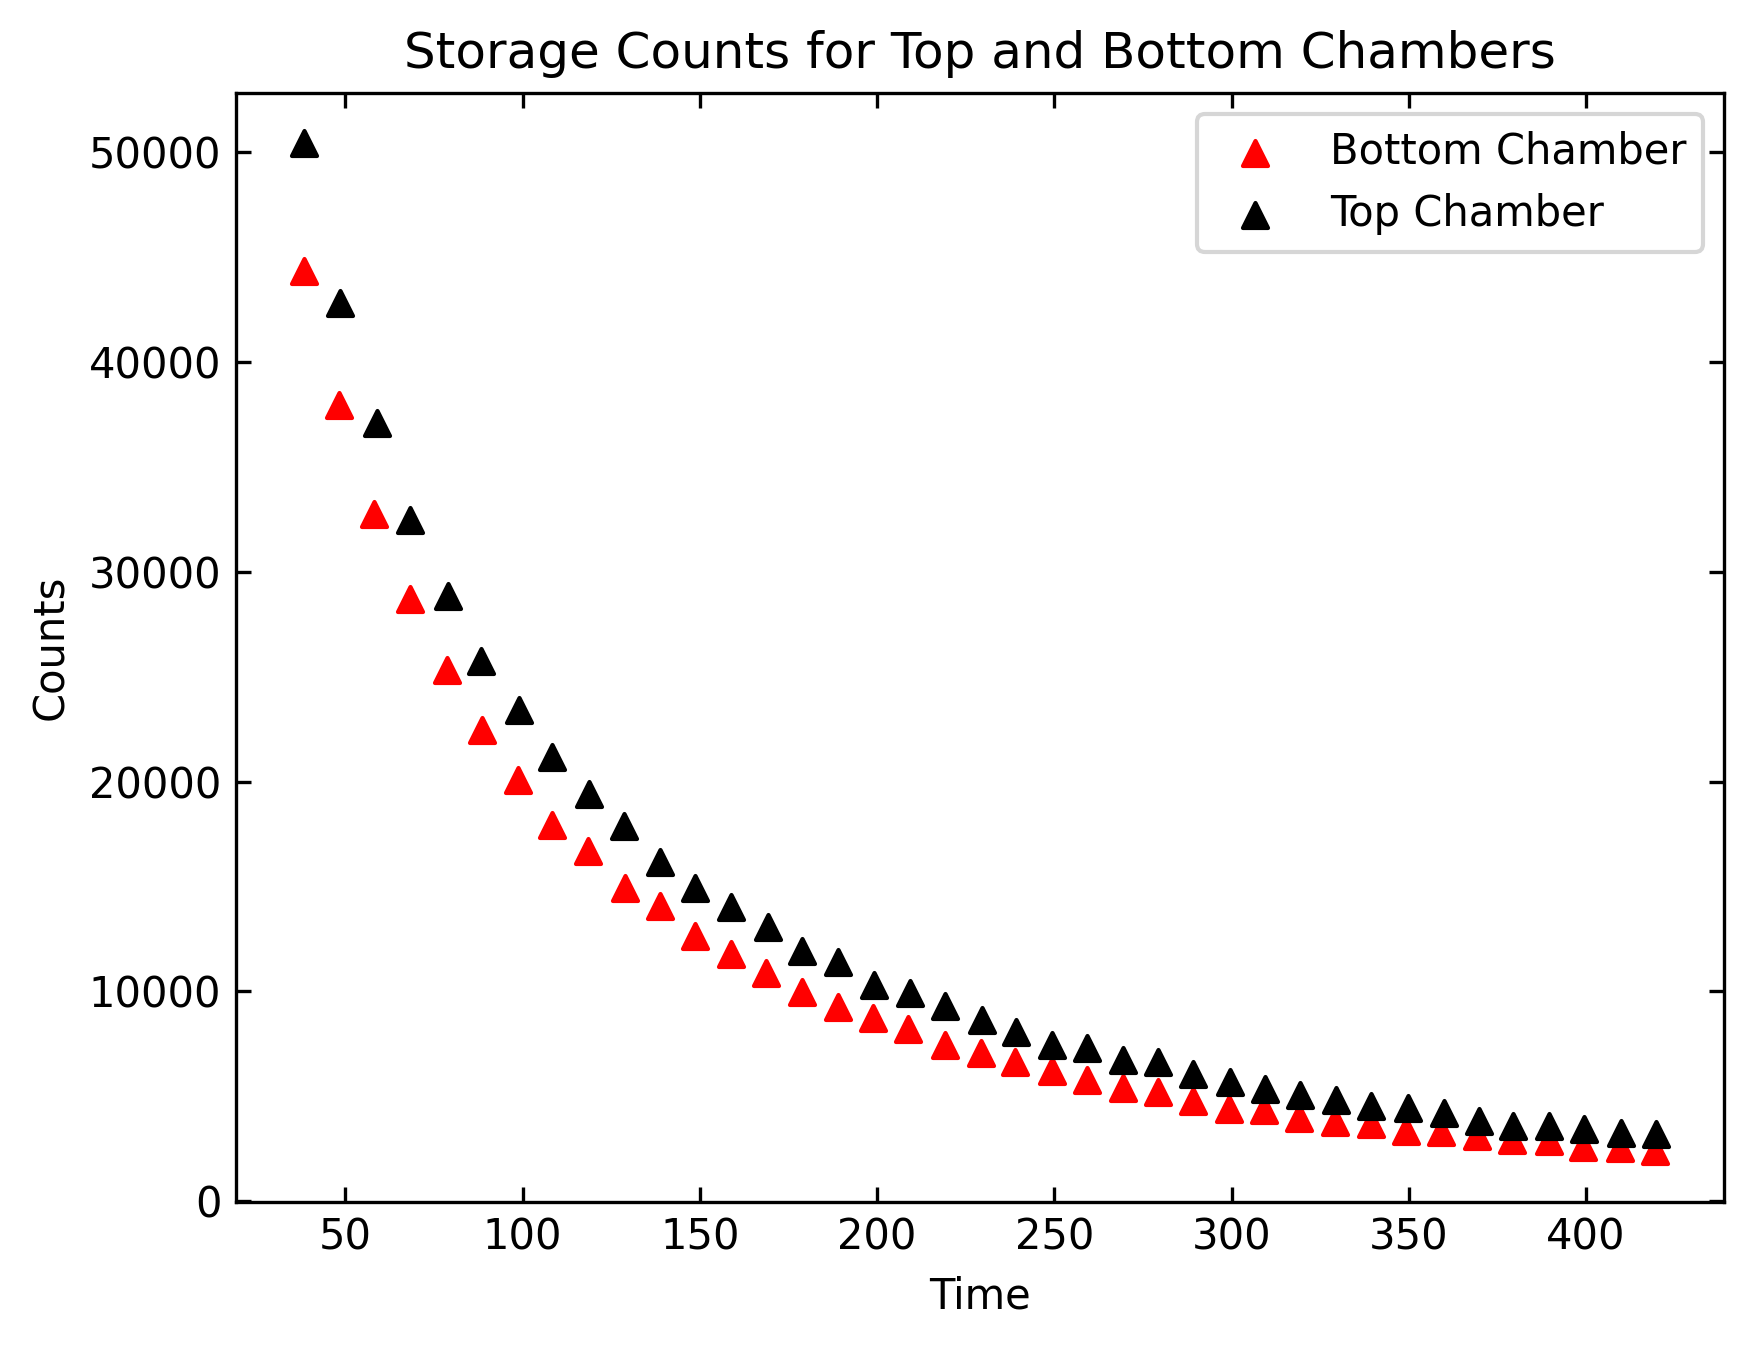

In [46]:
plot.figure(dpi=300)
plot.scatter(TstoreBOT, CountsBOT, c='red', marker='^', label='Bottom Chamber')
plot.scatter(TstoreTOP, CountsTOP, c='black',marker='^', label='Top Chamber')
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.xlabel('Time')
plot.ylabel('Counts')
plot.title('Storage Counts for Top and Bottom Chambers')
plot.legend()
plot.show()

C:\Users\nelso\AppData\Local\Temp\ipykernel_13292\532150854.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plot.errorbar(TstoreTOP, CountsTOP, yerr=Ttop_err, c='red', fmt='r.', label = "Top Storage Chamber")


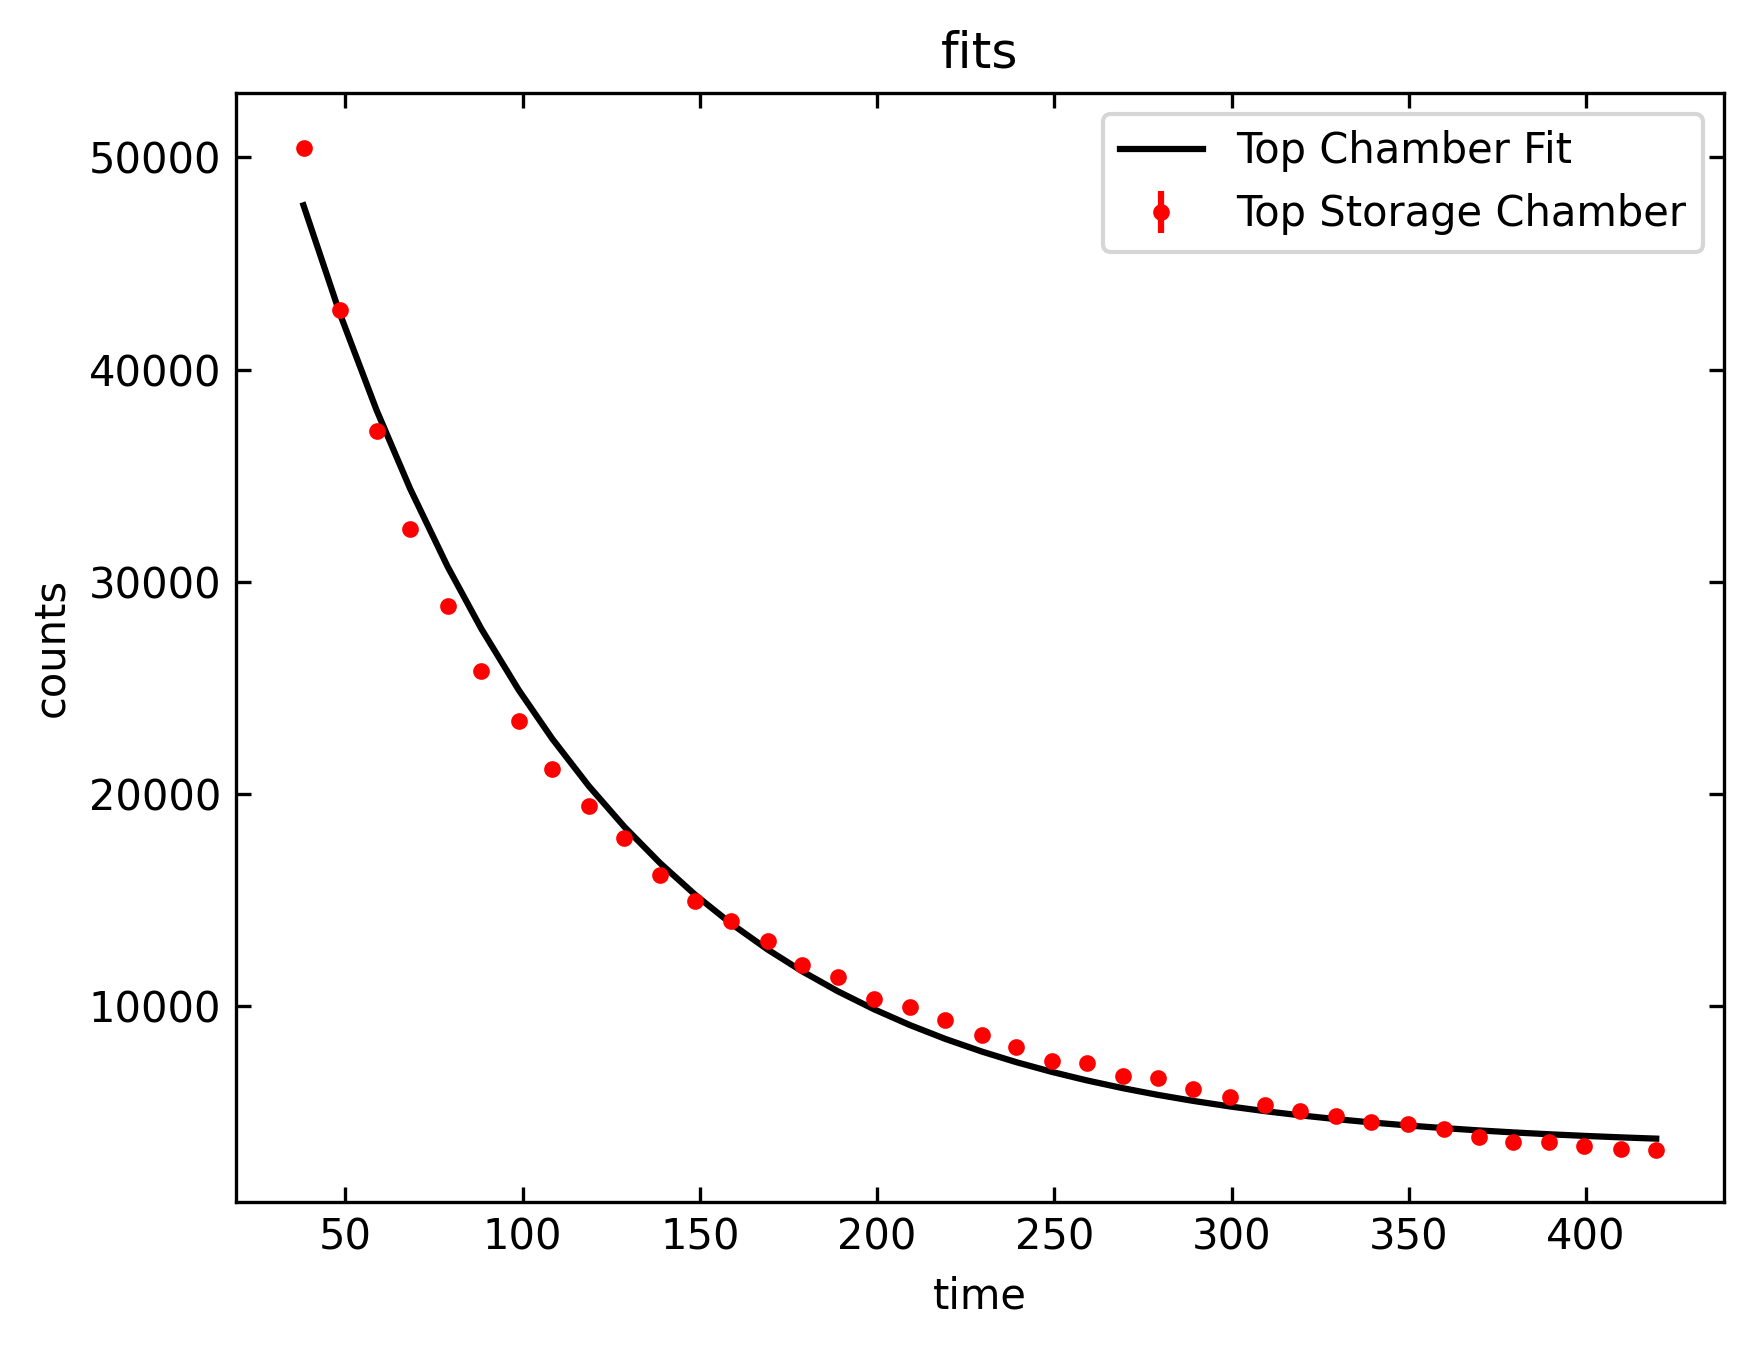

In [47]:
N1TOP = 70000

def countsTOP(TstoreTOP, t, b): 
    
    CountsTOP = N1TOP*np.exp(-TstoreTOP/t)+b
    return CountsTOP


dof = len(TstoreTOP) - 2 



t_InitialGuess=95
b_InitialGuess=5

popt, pcov = optimize.curve_fit(countsTOP, TstoreTOP, CountsTOP, 
                                p0=[t_InitialGuess, b_InitialGuess], sigma=Ttop_err, maxfev=8000) 

t = popt[0] 
b = popt[1]
errors = np.sqrt(np.diag(pcov))
t_err = errors[0] 
b_err = errors[1]

y_fit1 = countsTOP(TstoreTOP, t, b)

plot.figure(dpi=300)
plot.errorbar(TstoreTOP, CountsTOP, yerr=Ttop_err, c='red', fmt='r.', label = "Top Storage Chamber")
plot.plot(TstoreTOP, y_fit1, marker=None, c='black', label = "Top Chamber Fit") #draws a fitting line without discrete markers
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.ylabel('counts')
plot.xlabel('time')
plot.title('fits') 
plot.show()


C:\Users\nelso\AppData\Local\Temp\ipykernel_13292\3759392079.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plot.errorbar(TstoreBOT, CountsBOT, yerr=Tbot_err, c='red', fmt='r.', label = "Bottom Storage Chamber")


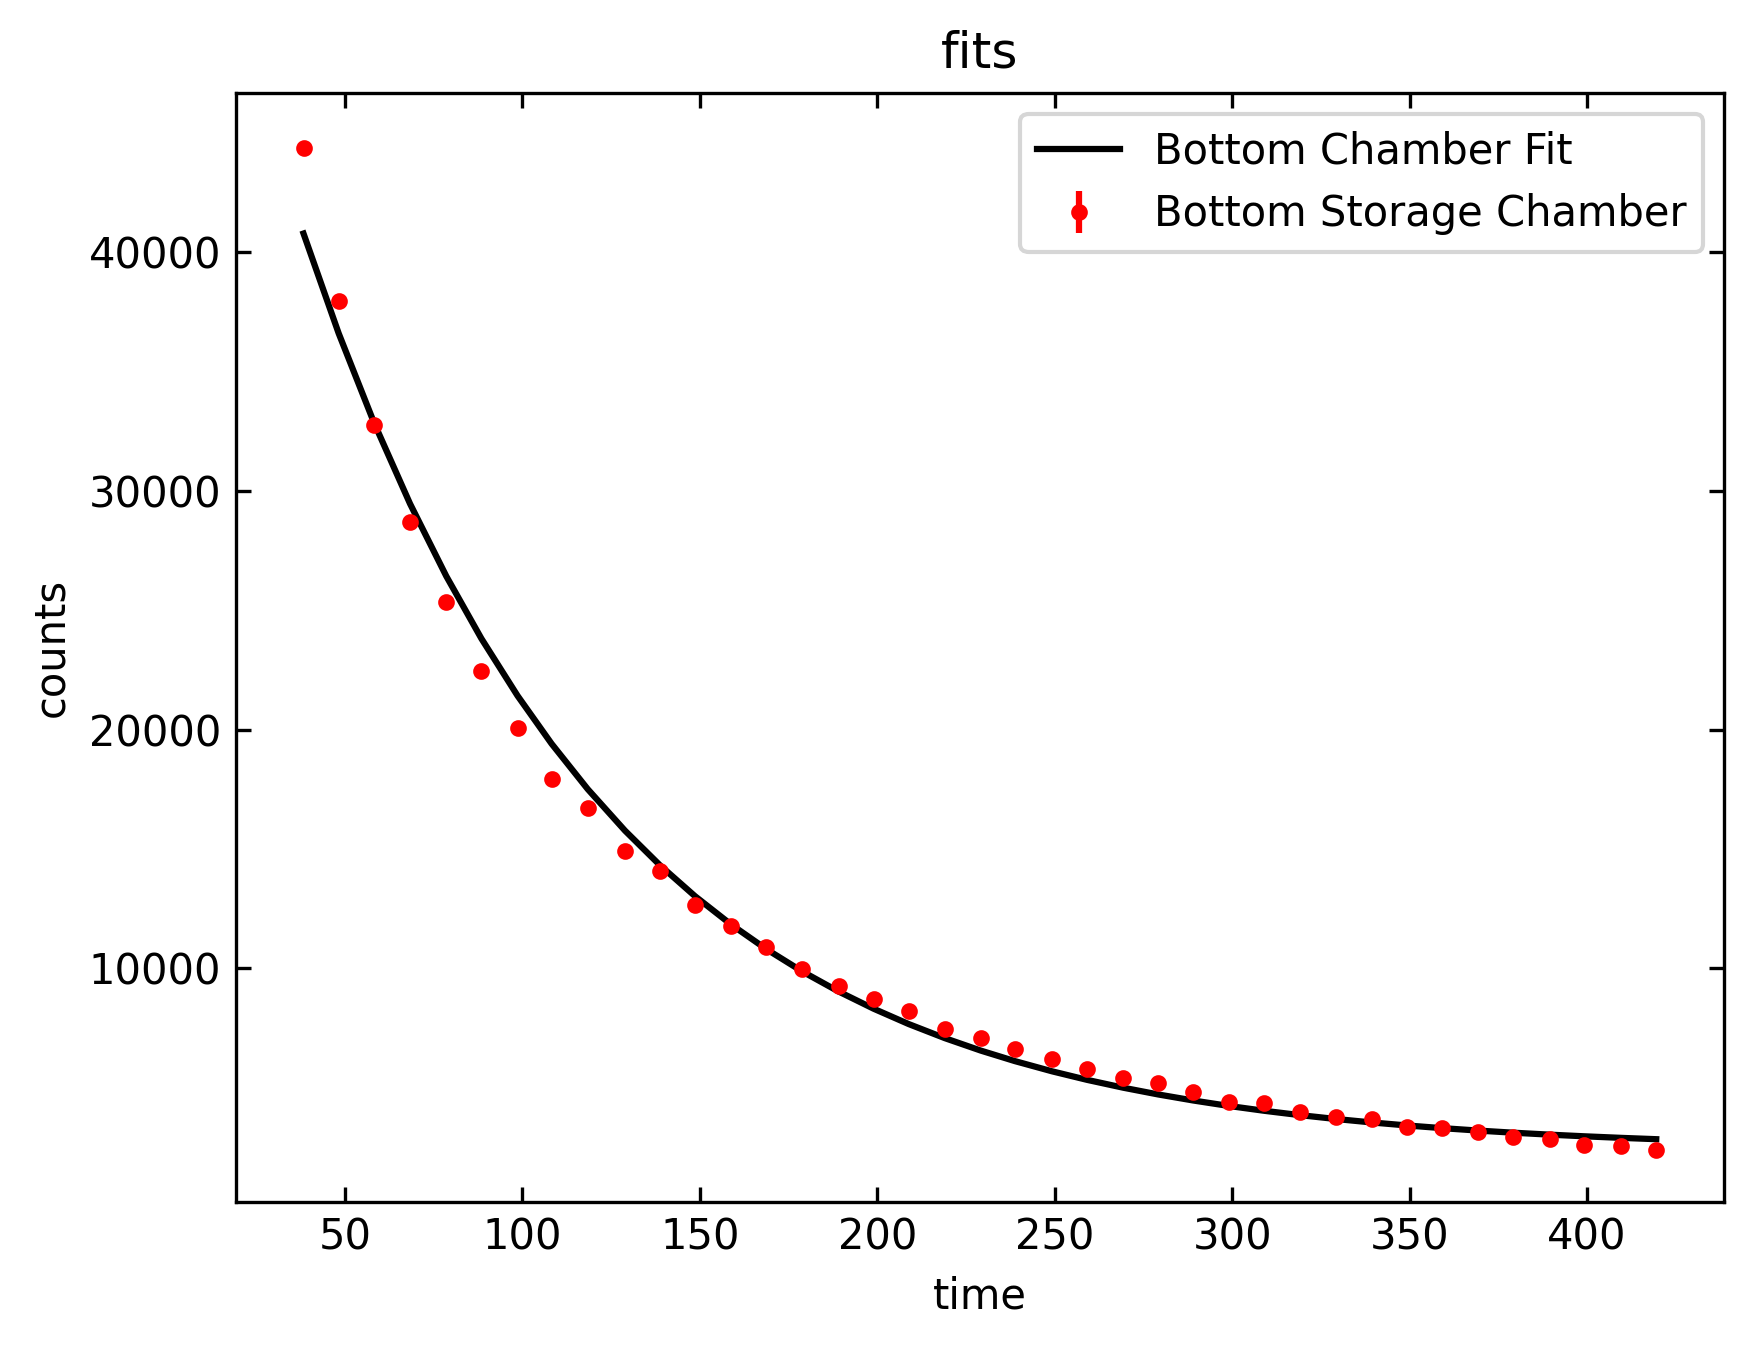

In [48]:
N1BOT = 60000

def countsBOT(TstoreBOT, t, b): 
    
    CountsBOT = N1BOT*np.exp(-TstoreBOT/t)+b
    return CountsBOT


dof = len(TstoreTOP) - 2 



t_InitialGuess=95
b_InitialGuess=5

popt, pcov = optimize.curve_fit(countsBOT, TstoreBOT, CountsBOT, 
                                p0=[t_InitialGuess, b_InitialGuess], sigma=Tbot_err, maxfev=8000) 

t = popt[0] 
b = popt[1]
errors = np.sqrt(np.diag(pcov))
t_err = errors[0] 
b_err = errors[1]

y_fit = countsBOT(TstoreBOT, t, b)

plot.figure(dpi=300)
plot.errorbar(TstoreBOT, CountsBOT, yerr=Tbot_err, c='red', fmt='r.', label = "Bottom Storage Chamber")
plot.plot(TstoreBOT, y_fit, marker=None, c = 'black', label = "Bottom Chamber Fit") #draws a fitting line without discrete markers
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.ylabel('counts')
plot.xlabel('time')
plot.title('fits') 
plot.show()


C:\Users\nelso\AppData\Local\Temp\ipykernel_13292\2466230842.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plot.errorbar(TstoreTOP, CountsTOP, yerr=Ttop_err, c='red', fmt='r.', label = "Top Storage Chamber")


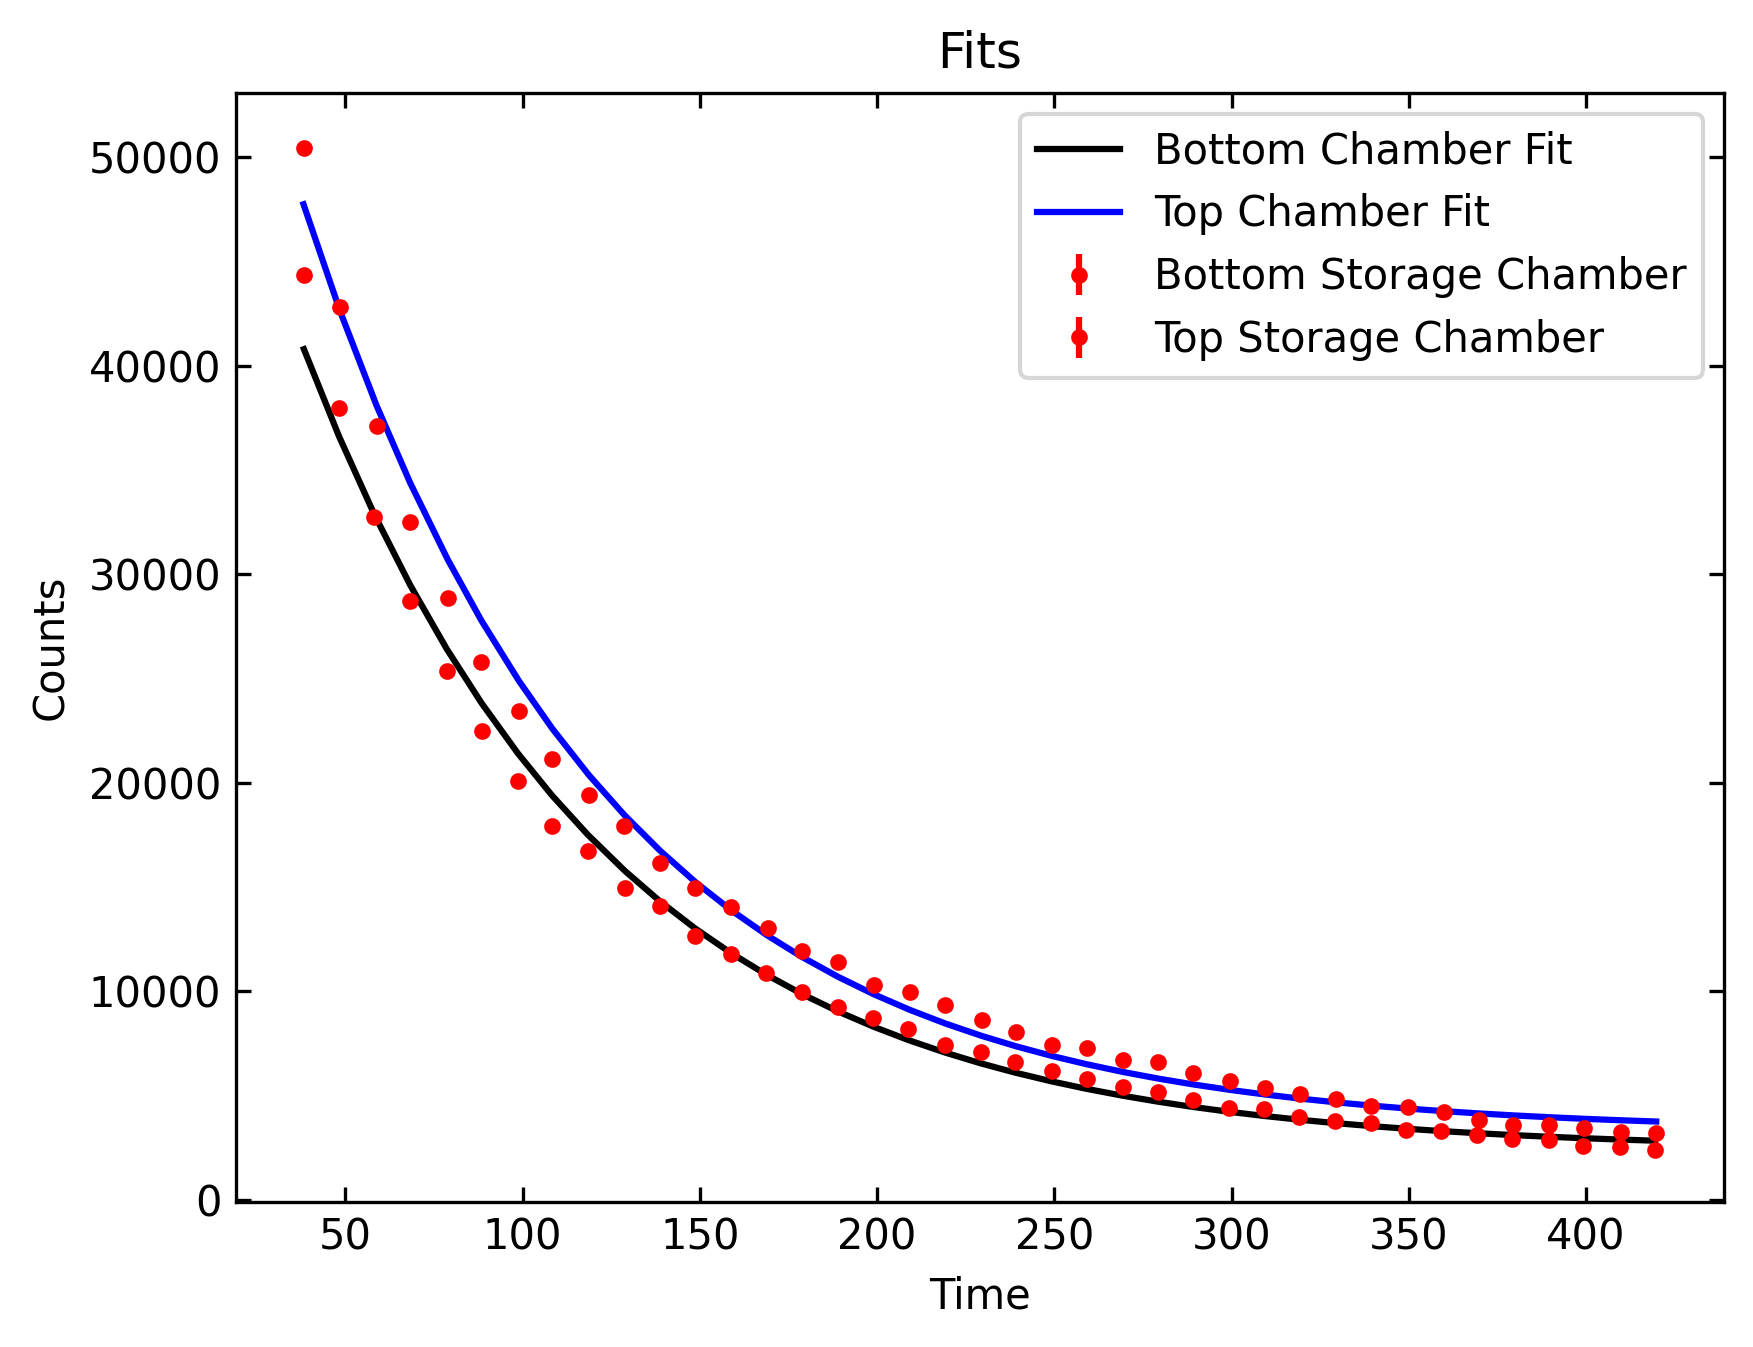

In [49]:
plot.figure(dpi=300)
plot.errorbar(TstoreBOT, CountsBOT, yerr=Tbot_err, fmt='r.', label = "Bottom Storage Chamber")
plot.plot(TstoreBOT, y_fit, c='black', marker=None, label = "Bottom Chamber Fit") #draws a fitting line without discrete markers
plot.errorbar(TstoreTOP, CountsTOP, yerr=Ttop_err, c='red', fmt='r.', label = "Top Storage Chamber")
plot.plot(TstoreTOP, y_fit1, c='blue', marker=None, label = "Top Chamber Fit") #draws a fitting line without discrete markers
plot.legend()
frameon=False
plot.gca().tick_params(direction="in")
plot.gca().xaxis.set_tick_params(top=True)
plot.gca().yaxis.set_tick_params(right=True)
plot.ylabel('Counts')
plot.xlabel('Time')
plot.title('Fits') 
plot.show()




In [50]:
#def plot_graph(x_values, y_values, xlabel='X-axis', ylabel='Y-axis', title='Graph'):
    # Plot the graph
   # plot.plot(x_values, y_values, marker='o', linestyle='-')
    
    # Set labels and title
   # plot.xlabel(xlabel)
   # plot.ylabel(ylabel)
  #  plot.title(title)
    
    # Show the plot
  # plot.grid(True)
  #  plot.show()

# Input x and y values
#x_values = [float(input("Enter x value {} : ".format(i+1))) for i in range(10)]
#y_values = [float(input("Enter y value {} : ".format(i+1))) for i in range(10)]

# Input labels
#xlabel = input("Enter X-axis label: ")
#ylabel = input("Enter Y-axis label: ")
#title = input("Enter Title: ")

# Plot graph
#plot_graph(x_values, y_values, xlabel, ylabel, title)

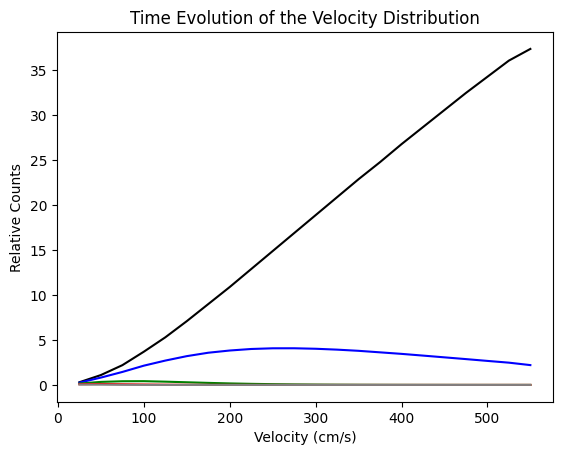

In [51]:
#Function let's us play around with the time development

a_hole_valve = 10
p_holev = v * a_hole_valve / 4 /  vol_store
sum_load = p_wall + P_3 + p_holeg + p_n
sum_store = p_wall + P_3 + p_holev + p_n + P_b

v140 = v100 * np.exp(-(40) * sum_store)
v260 = v100 * np.exp(-(160) * sum_store)
v420 = v100 * np.exp(-(320) * sum_store)
v580 = v100 * np.exp(-(480) * sum_store)

plot.plot(v, v100, c = 'black')
plot.plot(v, v140, c = 'blue')
plot.plot(v, v260, c = 'green')
plot.plot(v, v420, c = 'red')
plot.plot(v, v580, c = 'gray')
plot.ylabel('Relative Counts')
plot.xlabel('Velocity (cm/s)')
plot.title('Time Evolution of the Velocity Distribution')
plot.show()


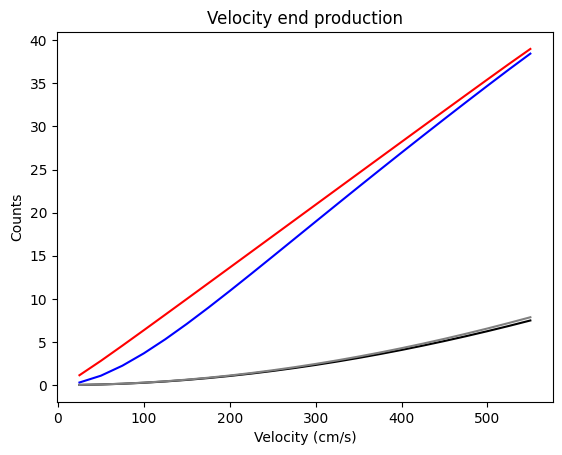

In [52]:
n0v = 5.5E-6
t5 = n0v * (1 - np.exp(-sum_load * 5)) * v**2 / sum_load
t100 = n0v * (1 - np.exp(-sum_load * 100)) * v**2 / sum_load
t3000 = n0v * (1 - np.exp(-sum_load * 3000)) * v**2 / sum_load
v2 = t5 * v**2 / v**2 * 1.05

plot.plot(v, t5, c = 'black')
plot.plot(v, t100, c = 'blue')
plot.plot(v, t3000, c = 'red')
plot.plot(v, v2, c = 'gray')
plot.ylabel('Counts')
plot.xlabel('Velocity (cm/s)')
plot.title('Velocity end production')
plot.show()